In [175]:
import requests
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random


In [176]:
base_url = 'https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/global-shark-attack/records'


def fetch_data(limit=100):
    json_data = []
    offset = 0
    total_data = None
    calls = 0
    
    while total_data is None or offset < total_data :
        params = { 
            'limit' : limit, 
            'offset' : offset
        }
         
        try:
            url=f'{base_url}'
       
            response = requests.get(url, params=params)
            response.raise_for_status()
            
            data = response.json()
            
            if total_data is None:
               total_data = data.get('total_count')
            
            results = data.get('results', [])
            json_data.extend(results)
            
            offset += limit
            calls+=1
            
            
        except requests.exceptions.HTTPError as error:
            print ('Http Error: ',error)
            return error
        except requests.exceptions.ConnectionError as error:
            print ('Error Connecting: ',error)
            return error
        except requests.exceptions.Timeout as error:
            print ('Timeout Error: ',error)
            return error
        except requests.exceptions.RequestException as error:
            print ('OOps: Something Else ',error)
            return error
    
    print(f'Checking number of calls: {calls}')
    return json_data


In [177]:
def generate_csv():
    
    api_data = fetch_data()

    if isinstance(api_data, list):
        df = pd.DataFrame(api_data)
        df.to_csv("Shark_Attacks.csv", index=False)
        print('CSV has been generated correctly')
    else:
        print(f'Ha ocurrido un error durante la recepcion de los datos: {api_data}')
        


generate_csv()

Checking number of calls: 69
CSV has been generated correctly


In [50]:
df= pd.read_csv("Shark_Attacks.csv")

In [51]:
df

,date,year,type,country,area,location,activity,name,sex,age,...,fatal_y_n,time,species,investigator_or_source,pdf,href_formula,href,case_number,case_number0,original_order
0,2021-06-30,2021.0,Unprovoked,USA,California,"Catalina Island, Orange County",Canoeing,Eddie Cahill,M,15.0,...,N,07h15,NaN,"R. Collier, GSAF & K. McMurray, TrackingSharks...",2021.06.30-Cahill.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.06.30,2021.06.30,6675.0
1,2015-07-10,2015.0,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,M,38,...,N,08h45,"White shark, 7'","KTLA, 7/10/2015",2015.07.10-Miskin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.10,2015.07.10,5938.0
2,2008-06-01,2008.0,Unprovoked,BRAZIL,Pernambuco,"Piedade, Recife",Swimming,Wellington dos Santos,M,14,...,N,15h00,Bull shark,Associated Press,2008.06.01-Santos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.06.01.a,2008.06.01.a,5075.0
3,2008-03-28,2008.0,Unprovoked,USA,Florida,"Near Cocoa Beach, Brevard County",Boogie Boarding,Teresa Holloway,M,NaN,...,N,NaN,a small shark,"D. MacAnnally, Eyewitness News",2008.03.28.a-Holloway.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.03.28.a,2008.03.28.a,5046.0
4,1976-06-10,1976.0,Unprovoked,USA,Hawaii,"Kama'ole Beach, Park No. 1, Kihei, Maui",Swimming,Donald Gard,M,NaN,...,N,NaN,0.9 m to 1.5 m [3' to 5'] shark,"J. Borg, p.74; L. Taylor (1993), pp.102-103",1976.06.10-Gard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1976.06.10,1976.06.10,3137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,1863-07-09,1863.0,Provoked,USA,Hawaii,Palama,Fishing,male,M,NaN,...,N,NaN,NaN,"Pacific Commercial Advertiser, 7/9/1863",1863.07.09-Palama.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1863.07.09,1863.07.09,355.0
6886,2002-04-21,2002.0,Invalid,AUSTRALIA,New South Wales,26 nautical miles out to sea off Lake Macquarie,Fishing (Drowned 2-Apr-2002),Mr. Kang Suk Lee,M,52.0,...,UNKNOWN,NaN,Invalid,Newcastle Herald. 10/3/2002,2002.04.21-KangSukLee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2002.04.21,2002.04.21,4461.0
6887,1995-06-17,1995.0,Unprovoked,USA,South Carolina,"Garden City Beach, Horry County",Surfing,Jim Whitney,M,NaN,...,N,NaN,NaN,"C. Creswell, GSAF; Charlotte Observer, 8/12/1995",1995.06.17.b-Whitney.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1995.06.17.b,1995.06.17.b,3948.0
6888,1974-03-21,1974.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Amanzimtoti,Surfing,James Arthur Gurr,M,21.0,...,N,16h30 or 18h00,1.8 m [6'] shark,"J. Gurr, M. Levine, GSAF; G. Charter, NSB; T. ...",1974.03.21-Gurr.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1974.03.21,1974.03.21,3046.0


In [40]:
df.columns


Index(['date', 'year', 'type', 'country', 'area', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'fatal_y_n', 'time', 'species',
       'investigator_or_source', 'pdf', 'href_formula', 'href', 'case_number',
       'case_number0', 'original_order'],
      dtype='object')

In [84]:

df_limpio= df.drop(['investigator_or_source', 'pdf', 'href_formula', 'href', 'case_number', 'case_number0', 'original_order'], axis=1)
    


In [180]:
df_limpio.head(3)

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,time,species
0,2021-06-30,2021.0,Unprovoked,USA,California,"Catalina Island, Orange County",Paddling,Eddie Cahill,M,15.0,Hand injured,[N],Morning,NaN
1,2015-07-10,2015.0,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,M,38,"No injury, shark bumped & damaged board",[N],Morning,White shark
2,2008-06-01,2008.0,Unprovoked,BRAZIL,Pernambuco,"Piedade, Recife",Swimming,Wellington dos Santos,M,14,"Hand severed, buttocks bitten",[N],Afternoon,Bull shark


In [197]:
def modificar_mortal_no_mortal(valores):
    nuevos_valores = [] 
    for valor in valores:         
        if valor == 'UNKNOWN' or valor == '2017.0' or valor == ['U', 'N', 'K', 'N', 'O', 'W', 'N'] or valor == ['2', '0', '1', '7', '.', '0']:
            nuevos_valores.append(np.nan)
        elif valor == 'F' or valor == 'y' or valor == 'Y x 2' or valor == ['Y', ' ', 'x', ' ', '2'] or valor == ["Y"]:
            nuevos_valores.append('Y')
        elif valor == 'Nq' or valor == 'n' or valor== ['N', 'q'] or valor == ["N"]:
            nuevos_valores.append('N')
        else:
            nuevos_valores.append(valor)
    return nuevos_valores




In [198]:
df_limpio["fatal_y_n"]= modificar_mortal_no_mortal(df_limpio["fatal_y_n"])

In [193]:
df_limpio

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,time,species,continent
0,2021-06-30,2021.0,Unprovoked,USA,California,"Catalina Island, Orange County",Paddling,Eddie Cahill,M,15.0,Hand injured,[N],Morning,NaN,North America
1,2015-07-10,2015.0,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,M,38,"No injury, shark bumped & damaged board",[N],Morning,White shark,North America
2,2008-06-01,2008.0,Unprovoked,BRAZIL,Pernambuco,"Piedade, Recife",Swimming,Wellington dos Santos,M,14,"Hand severed, buttocks bitten",[N],Afternoon,Bull shark,Other
3,2008-03-28,2008.0,Unprovoked,USA,Florida,"Near Cocoa Beach, Brevard County",Surfing,Teresa Holloway,M,NaN,Right foot bitten,[N],NaN,NaN,North America
4,1976-06-10,1976.0,Unprovoked,USA,Hawaii,"Kama'ole Beach, Park No. 1, Kihei, Maui",Swimming,Donald Gard,M,NaN,Leg & foot bitten,[N],NaN,NaN,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,1863-07-09,1863.0,Provoked,USA,Hawaii,Palama,Fishing,male,M,NaN,Hand severed by noosed shark PROVOKED INCIDENT,[N],NaN,NaN,North America
6886,2002-04-21,2002.0,Invalid,AUSTRALIA,New South Wales,26 nautical miles out to sea off Lake Macquarie,Fishing,Mr. Kang Suk Lee,M,52.0,"Drowned, his remains were found in a 3m [10'],...",NaN,NaN,NaN,Other
6887,1995-06-17,1995.0,Unprovoked,USA,South Carolina,"Garden City Beach, Horry County",Surfing,Jim Whitney,M,NaN,Foot bitten,[N],NaN,NaN,North America
6888,1974-03-21,1974.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Amanzimtoti,Surfing,James Arthur Gurr,M,21.0,"No injury, surfboard bitten",[N],Afternoon,NaN,Other


In [166]:
def modificar_especies(especies):
    nuevos_valores = [] 
    no_identificados = ['Several sharks involved',"Two shark's teeth recovered from canoe",'Tooth fragments recovered from hull',"Thought to involve a 3' to 4' shark, but shark involvement not confirmed",'The fish was harpooned, dried, and presented to the sailor, who went round Europe exhibiting it  It was said to be 20 feet long.','Species unidentified','Shovelnose guitarfish, adult male', 'Shovelnose shark which is a ray, not a shark)', 'Said to involve 2 sharks','Remains recovered from 3 sharks', 'Remains recovered from shark caught days later', 'Reported as  a shark bite but toothmarks appear to be those of a dolphin', 'Reported as a shark attack, the story was a hoax', 'Reported as shark bite but injury caused by stingray',
 'Reported by media as shark attack, but shark involvement prior to death was not confirmed','Questionable incident - shark bite may have precipitated drowning', 'Questionable incident; reported as shark attack but thought to involve a pinniped instead','Identified as C. gangeticus by Dr. J. Fayrer','Fishermen recovered partial remains from shark a week later','Dooley believed his Injury was caused by stingray (Dasyatidae family)', 'Doubtful / Unconfirmed attack / Unable to verify in local records','Description of shark does not ring true','Considered a Doubtful incident',"Atkins' remains were recovered from a dusky shark, C. obscurus, by Capt. W. F. Young, shark fisherman", 'Attacked by a number of sharks', 'Authorities report injury caused bya barracuda', 'A pack of sharks','Possibly a broadnose 7-gill shark',"7 shark's teeth found embedded in the woodwork of the boat", "7' female shark",'Remains recovered 5 days later','Lesser spotted dogfish, Scyliorhinus canicula, less than 80 cm in length','shark involvement not confirmed', 'shark pup','No shark invovlement', 'No shark invovlement - it ws a publicity stunt', 'Not a shark attack; it was a hoax', 'Not authenticated', 'Nurse shark','Unidentified shark', 'Unknown', 'Unknown, but it was reported that a shark tooth was recovered from the wound', 'Unknown, but the shark was caught and put on exhibition', 'Shark caught later', 'Shark had a very large girth', 'Shark involvement  not confirmed', 'Shark involvement  questionable', 'Shark involvement doubtful',
 'Shark involvement not cofirmed', 'Shark involvement not confirmed & highly unlikely', 'Shark involvement not confirmed, injury may be due to a stingray', 'Shark involvement not confirmed; officials considered barracua',
 'Shark involvement not confirmed; thought to be a barracuda bite', 'Shark involvement not confirmes', 'Shark involvement prior to death could not be determined', 'Shark involvement prior to death still to be determined', 'Shark involvement prior to death suspected but not confirmed',
 'Shark involvement prior to death unconfired', 'Shark involvement prior to deaths unconfirmed', 'Shark involvement prior to deaths was not confirmed', 'Shark involvement probable', 'Shark involvement probable, but not confirmed', 'Shark involvement unconfirmed', 'Shark involvement unconfirmed but considered probable', 'Shark seen feeding on turtle scraps thrown overboard prior to incident.',
 'Shark was said to “have a very rough ½”-thick skin”','Injuries not caused by a shark', 'Injury believed caused by an eel, not a shark', 'Injury most likely caused by barracuda, not a shark', 'Invalid incident','C. leucas tooth fragment recovered from kayak', 'C. macrurus captured 48 hours after attack with tissue removed from man in its gut; species identified by G.P. Whitley,  reported as C. obscurus by  R. Steel',
 'C. maculpinnis or C. limbatus','Shark involvement not confirmed, injury may have been caused by a bluefish','Shark involvement prior to death remains unconfirmed','Reported as shark attacks but injuries caused by toadfish','Shark involvement prior to death was not confirmed','Invalid','Shark involvement not confirmed','Shark involvement prior to death unconfirmed', 'Shark involvement highly doubtful',
 "2 sharks involved", "Shark involvement suspected but not confirmed", "Shark involvement questionable", "Questionable incident", "Questionable", "No shark involvement", "Shark involvement prior to death not confirmed",
 "Unidentified species", "3 sharks", "A pack of 6 sharks", "Unidentified ", "small blacktip shark", "Questionable Incident", "Unidentified", 'According to Benjamin, the injury was inflicted by a barracuda, not a shark']

    galapagos_sharks = ['Galapagos shark', "Galapagos shark, 5'-9'", "Galapagos shark, 6'", 'Galapagos shark?', "Hand found in gut of 2.9 m to 3.3 m [9'7 to 10'11] Galapagos shark, C. galapagensis"]

    goblin_sharks = ['Goblin shark', "Goblin shark, 4.2'"]
    
    dusky_sharks = ['Dusky shark, 1 m', "Dusky shark, 12'", 'Dusky shark, 2m','Juvenile dusky shark']
    
    basking_sharks = ['Basking shark']

    bonita_sharks = [ 'Bonita sharkk, 200-lb']
    
    angel_sharks = ['Angel shark', 'Angel shark, 1.2m']

    salmon_sharks = ['Salmon shark suspected, but unlikely', 'Salmon shark, juvenile']

    cookiecutter_sharks = ['Thought to involve a cookiecutter shark']

    dogfish_sharks = ['a dog shark','dogfish', 'dogfish shark',]
    
    carpet_sharks = ["1.8 m [6'] carpet shark", "76 cm [2.5'] carpet shark", 'Carpet shark', "Carpet shark, 1.5 m [5']", "Carpet shark, 10'", "Carpet shark, 5'",  'small carpet shark']
    
    zambesi_sharks = ["1.8 m [6'] Zambezi shark", "Possibly a  1.8 m [6'] Zambezi shark","1.5 m to 1.8 m [5' to 6'] Zambesi shark", "2 m [6'9] Zambesi shark", '300- to 400-lb Zambesi shark', "Six Zambesi sharks seen to 1.5 m [5'] in length", 'Thought to involve a Zambesi shark',
 'Zambesi shark''Zambesi shark', "Zambesi shark, 1.2 m [4']", "Zambesi shark, 1.7 m [5.5']", "Zambesi shark, 1.8 m [6']", "Zambesi shark, 2 m [6'9]", 'Zambesi shark, 2m', "Zambesi shark, 4'9", 'Zambesi shark?',
 'Zambezi shark (tooth fragments recovered)']
    
    wobbegong_sharks = ['Possibly a wobbegong','Wobbegong', 'Wobbegong shark', 'Wobbegong shark, 1 m', "Wobbegong shark, 1.2 m [4']", "Wobbegong shark, 1.2 m [4'] k", "Wobbegong shark, 1.4 m [4'6]", "Wobbegong shark, 1.4 m [4.6']",
 "Wobbegong shark, 1.5 m [5']", 'Wobbegong shark, 1.6 to 1.8m', 'Wobbegong shark, 1.6m', "Wobbegong shark, 1.8 m [6']", 'Wobbegong shark, 1m', 'Wobbegong shark, 2 m', 'Wobbegong shark, 2m', "Wobbegong shark, 3'", "Wobbegong shark, 4'", "Wobbegong shark, 5'", "Wobbegong shark, 6'", 'Wobbegong shark, 60cm', "Wobbegong shark, O. barbatus,  1.8 m [6'], identified by G.P. Whitley",
 'Wobbegong shark?', 'Wobbegong, 2m', 'Wobbegongs']
    
    ragged_sharks =['Raggedtooth shark', 'Raggedtooth shark, 1 m', "Raggedtooth shark, 1.2 m [4']", "Raggedtooth shark, 1.2 m to 1.5 m [4' to 5']", 'Raggedtooth shark, 1.3 m', 'Raggedtooth shark, 1.5 m', "Raggedtooth shark, 1.5 m [5']",
 "Raggedtooth shark, 1.5 m [5'] (tooth fragment recovered)", "Raggedtooth shark, 1.5 to 2 m [5' to 6.75']", 'Raggedtooth shark, 1.96 m, 140-kg', 'Raggedtooth shark, 100-lb', 'Raggedtooth shark, 150-kg',
 'Raggedtooth shark, 2 m', "Raggedtooth shark, 2 m [6'9]", "Raggedtooth shark, 2 m [6'9], 5-year-old, captive female", "Raggedtooth shark, 2 m [6.75']", "Raggedtooth shark, 2.5 m [8.25']", 'Raggedtooth shark, 2.5 m to 3 m',
 'Raggedtooth shark, 2.5m', "Raggedtooth shark, 2.7 m [9']", 'Raggedtooth shark, 2m', "Raggedtooth shark, 3.5 m [11.5']", "Raggedtooth shark, 50-kg [110-lb], 2 m [6.75'] gaffed", 'Raggedtooth shark, 56-kg [123-lb]',
 'Raggedtooth shark, >1 m']
    
    black_sharks = ["1.8 m to 2.4 m [6' to 8'] black finned shark", "2.7 m [9'] shark with black-tipped pectoral fins", '90-kg blackfin shark', 'Black shark', 'Small dusky shark or blackfin shark', 'a black-tipped shark',
 'black tipped shark','small blacktip shark?',"1.8 m [6'] shark, possibly a blacktip", '1.8 m blacktip reef shark', "1.8 m to 2.1 m [6' to 7'] spinner or blacktip shark", '2 m shark, possibly a dusky or blacktip shark',
 "3' shark, possibly  a blacktip or spinner shark", "5' blacktip shark", "6' to 7' blacktip shark", "60 cm to 90 cm [2' to 3'] blacktip or spinner shark", 'A 10-year-old 94-pound pregnant blacktip reef shark',
 'Atlantic blacktip shark', 'Juvenile blacktip shark', 'Juvenile dusky or blacktip shark', 'Miami, a 60 cm blacktip  shark and two 60 cm bamboo catsharks', 'Possibly  a blacktip or spinner shark', "Possibly a 1' to 3' blacktip or spinner shark",
 "Possibly a 1.5 m [5'] blacktip or spinner shark", 'Possibly a blacktip reef shark', 'Possibly a blacktip shark', 'Possibly a juvenile blacktip shark', 'Possibly a small blacktip shark', 'Said to involve a blacktip shark', 'small blacktip shark?'"1.8 m [6'] blacktip shark or Caribbean reef shark", "1.8 m [6'] blacktip shark or spinner shark","1.5 m [5'] blacktip shark","1.4 m [4'6] blacktip shark", "1.2 m [4'] blacktip or sandbar shark", "1.2 m [4'] blacktip shark","0.9 m [3'] shark,  probably a blacktip or spinner shark",'Black shark', 'Blacktail reef shark', 'Blacktip', 'Blacktip Reef shark', 'Blacktip or Spinner shark', "Blacktip or spinner shark, 4'", 'Blacktip or spinner shark?', 'Blacktip reef shark pup',
 "Blacktip reef shark, 1.5 m [5']", 'Blacktip reef shark, juvenile', 'Blacktip shark pup', "Blacktip shark, 1.2 m to 1.8 m [4' to 6']", "Blacktip shark, 1.8 m [6']", "Blacktip shark, 1.8 m to 2.1 m [6' to 7']",
 "Blacktip shark, 2 m [6.75']", "Blacktip shark, 2'", 'Blacktip shark, 2m', "Blacktip shark, 4' to 5'", "Blacktip shark, 6'", "Blacktip shark, C. maculipinnis. 1.9 m to 2.1 m [6.5' to 7']", 'Blacktip shark?',
 'Blacktip whaler,      Carcharhinus tilstoni, 2m','Blacktip reef shark, 1m','Bronze whaler shark, 3m', "Possibly a 1.5 m [5'] blacktip shark","Blacktip shark, 6' to 7'", "Blacktip shark, 2.4 m to 3 m [8' to 10']", "6' blacktip shark","4' to 5' blacktip shark",'Thought to involve a blacktip shark','Blacktip shark, juvenile',"1.5 m to 1.8 m [5' to 6']  blacktip shark","Blacktip shark, 4'","small blacktip shark  ","Blacktip shark, 5'",'Blacktip reef shark, 1m', "Possibly a 1.5 m [5'] blacktip shark", "Blacktip shark, 2.4 m to 3 m [8' to 10']", "Blacktip shark, 6' to 7'", "Possibly a sandbar shark or small blacktip shark",
 "3' blacktip shark", "1.8 m [6'] blacktip shark", "Blacktip reef shark", "blacktip or spinner shark", "Blacktip shark", "Blacktip or spinner shark", "Possibly a juvenile blacktip or spinner shark",
 "Blacktip shark, 5' to 6'"]
    
    white_sharks = ["0.9 m to 1.2 m [3' to 4'] white shark","1.8 m [6'] white shark", "1.8 m to 2.4 m [6' to 8'] sharks, most were oceanic whitetip sharks", "1.8 m to 2.4 m [6' to 8'] white shark", "12' to 14' white shark",
 "12' white shark", "2 m [6.75'] white shark", "2.4 m [8'] white shark", "2.4 m [8'] white shark, species identity confirmed by tooth fragment", "2.4 m [8'] white shark, species identity confirmed by witnesses & tooth pattern in surfboard",
 "2.4 m to 3 m [8' to 10'] white shark", "2.5 m to 3 m [8.25' to 10']  white shark", '2.5 oceanic whitetip shark', "2.7 m [9'] white shark", "2.8 m [9'3] white shark", "3 m [10'] white shark (Tooth  recovered from boat)",
 "3 m to 4 m [10' to 13']  white shark", '3 m to 4 m white shark', "3 m to 4.5 m [10' to 15'] white shark", "3 m to 5 m [10' to 16.5'] white shark", '3 m white shark', "3.5 m [11.5']  white shark", "3.5 m [11.5'] female white shark named Notchfin", "3.5 m [11.5'] white shark",
 "3.5 m [11.5'], 510-kg [1125-lb] hooked & shot white shark", '3.5 m white shark, tooth fragments recovered', '3.6 m  white shark  (or bronze whaler)', "3.6 m [11'9] white shark",
 "3.7 m to 4.3 m [12' to 14'] white shark", '3.7m  to 4.2 m white shark', "4 m [13'], 590-kg white shark", "4 m to 5 m [13' to 16.5']  white shark", '4 to 5 m white shark', '4 to 5m white shark', '4.2 m white shark', '4.5 m & 5 m white shark', "4.5 m [14'9] white shark", "4.5 m to 5.5 m [14.7' to 18'] white shark", "4.5 m to 5.5 m [15' to 18'] white shark",
 '4.5 m to 5.5m white shark', "4.9 m to 5.5 m [16' to 18'] white shark", '4.9 m white shark', "5 m  [16.5'] white shark", "5 m [16.5'] white shark, identification by K. Nakaya", "5 m to 5.5 m [16.5' to 18'] white shark", '5 m to 6 m white shark',
 '5 m to 7 m white shark', '5 m white shark', '5.2 to 5.8 m white shark', "5.5 m [18''] white shark", "5.5 m [18'] white shark, identified by witnesses & tooth marks",
 "5.5 m to 6 m [18' to 20']  white shark", "5.5 m to 6 m [18' to 20'] white shark", '5.7 m white shark', '6 m  white shark', "7 m [23'] white shark", "8' white shark or 7-gill shark", "9'2 white shark",
 ">2.4 m [8'] white shark", ">2.5 m [8.25'] white shark", ">3.4 m [11'] white shark", ">6 m [20'] white shark", '>6 m white shark, according to witnesses', 'A large white shark was filmed by divers on a local wreck 2 days prior to the incident.', "Alleged to involve a White shark, 7.6 m [25']", 'Alleged to involve a white shark with little yellow eyes',
 "Believed to involve a 2.8 m [9'3] white shark", 'Believed white shark and other smaller species of sharks involved.', 'Juvenile white shark', 'Juvenile white shark,  2.7 to 3.2 m',
 'Juvenile white shark?', "Mr. Burgess of ISAF announced the injury was the bite of a 1.8 m [6'], 2- to 3-year old white shark. Subsequent investigation revealed there was  no shark involvement in this incident",
 'Oceaniic whitetip shark/tiger shark, 2m shark', 'Porbeagle or white shark', "Remains recovered from 5.5 m [18'] white shark", "Reported to involve a 3.7 m [12'] shark, possibly a white shark",
 'Reported to involve a 4 m white shark', "Reported to involve a White shark, 6 m to 7m [20' to 23']", 'Reported to involve a white shark', 'Reportedly: oceanic whitetip sharks, blue sharks, tiger sharks & bull sharks',
 "Said to involve 6 to 7 m [20' to 23'] white shark", 'Said to involve a 1 m  white shark, but thought  that it was more likely a blue shark', "Said to involve a 6 m to 7 m [20' to 23'] white shark",
 "Said to involve a 7 m [23'] white shark", 'Said to involve a white shark but shark involvement not confirmed', 'Small shark with white-tipped dorsal fin', 'Species unknown, possible white shark',
 'Species unknown, possibly a white shark', 'Survivors said 2 species of sharks were involved:  oceanic whitetip sharks and another species', "Teeth in hull identified as those from a white shark 4.6 m [15'] in length", 'Though to involve a white shark',
 "Thought to involve a 12' white shark", "Thought to involve a 2.6 m [8.5'] white shark", 'Thought to involve a 5.5 m white shark named Kong', 'Thought to involve a white, bull or tiger shark',
 'Thought to involve an oceanic whitetip shark or a white shark', "Tooth fragment of a white shark recovered. Authorities believed shark was 6 m [20']  total length", "Two 3 m [10'] oceanic whitetip sharks",
 'White shark', 'juvenile white shark', 'said to involve an oceanic whitetip shark', 'unknown, possibly a white shark', 'white shark'"0.9 m to 1.2 m [3' to 4'] white shark",'Whale shark', 'Whaler or bull shark, 2m', "Whaler shark, 2.7 m [9'], 350- to 450-lb  identified by G.P. Whitley", "Whaler shark, 4 m [13']", 'White shark', 'White shark (identified by Dr. Hugh Smith)',
 'White shark (tooth fragment recovered)', 'White shark (tooth fragments recovered from hull of boat)', 'White shark (tooth fragments recovered)', "White shark 4.9 m [16']", 'White shark named “Spotty”',
 'White shark or bronze whaler', 'White shark or oceanic whitetip shark', 'White shark or thresher shark', 'White shark tooth fragment recovered from ankle & identified by Dr. W. I. Follett', 'White shark x 2',
 'White shark, 1,900-lb', "White shark, 1.5 m [5'] k", "White shark, 1.8 m [6']", "White shark, 1.8 m to 2.1 m [6' to 7']  according to Shreuder and a witness", "White shark, 11'", "White shark, 11' to 12'",
 "White shark, 11' to 13'", "White shark, 11'?", "White shark, 12' to 14'", "White shark, 12' to 15'", "White shark, 12' to 15' female", "White shark, 12', identity confirmed by tooth fragment, witness and photograph of captured shark",
 "White shark, 13'10, 1320-lb female", "White shark, 14' to 16'", "White shark, 14' to 18'", "White shark, 15' to 16'", "White shark, 15'2", "White shark, 15'3, 2,333-lb", "White shark, 16'", "White shark, 16', 2,312-lb",
 'White shark, 160-kg [353-lb], identity confirmed by tooth pattern', 'White shark, 1600-lb female', "White shark, 17' female", "White shark, 18' to 20'", "White shark, 19'", 'White shark, 2 m', "White shark, 2 m [6'9]  (Tooth fragment recovered from victim's shoulder & identified by J.T. Nicholls)",
 "White shark, 2 m to 4 m [6'9 to 13']", 'White shark, 2-to 3m', "White shark, 2.1 m [7']", "White shark, 2.3 m [7.5'], tooth fragment recovered", "White shark, 2.4 m to 3 m [8' to 10']", "White shark, 2.5 m [8.25']",
 "White shark, 2.5 m [8.25'], an immature female, previously injured", 'White shark, 2.5 to 3 m', "White shark, 2.7 m [9'1], 750-lb", "White shark, 2.7 m [9']", "White shark, 2.7 m [9'], 280-lb", "White shark, 2.7 m to 3 m [9' to 10']",
 'White shark, 2.8 to 3 m', 'White shark, 246-kg', 'White shark, 2m to 3 m', "White shark, 3 m [10'] k", "White shark, 3 m [10'], species identity confirmed by witnesses & tooth pattern in leg & board",
 "White shark, 3 m [10']; identifed by Dr. W.I. Follett on tooth marks", "White shark, 3 m to 3.7 m [10' to 12']", "White shark, 3 m to 4 m [10' to 13']", "White shark, 3 m to 5 m [10' to 15']",
 "White shark, 3 m to 5 m [10' to 16.5']", 'White shark, 3 to 3.5m', "White shark, 3.5 m [11.5']  male", "White shark, 3.5 m [11.5'], identified by W. I.  Follett on tooth fragments", "White shark, 3.5 m [11.5'], species identity confirmed by tooth fragment",
 "White shark, 3.5 m to 4 m [11.5' to 13']", "White shark, 3.6 m [11'9]", 'White shark, 3.6 m,  420 kg male', "White shark, 3.7 m [12']  according to witnesses", "White shark, 3.7 m [12'], 500 to 500-kg [1,200 lb], identified by W. C. Shroeder based on tooth fragment ebedded in gunwale",
 "White shark, 3.7 m to 4.6 m [12' to 15']", "White shark, 3.8 m [12.5']", 'White shark, 3.9 m, 550 kg, male', 'White shark, 3.9 to 4.2 m', 'White shark, 3m, seen in area and hooked 3 days later',
 "White shark, 4 m [13'] rk", 'White shark, 4 m to 5 m', 'White shark, 4 m to 5m', 'White shark, 4 m white shark', 'White shark, 4 to 5 m', "White shark, 4 to 5 m [13' to 16.5']", "White shark, 4.3 m 4.9 m [14' to 16']",
 "White shark, 4.3 m [14']", "White shark, 4.3 m [14'] (or bronze whaler)", "White shark, 4.3 m [14'], (tooth fragment recovered)", "White shark, 4.3 m to 4.9m [14' to 16']", "White shark, 4.4 m [14.5'] .",
 "White shark, 4.4 m to 5 m [14.5' to 16.5']", "White shark, 4.5 m  to 6 m [14'9 to 20'] according to witnesses", "White shark, 4.5 m [14'9]", 'White shark, 4.5 to 5 m', 'White shark, 4.5m', 'White shark, 4.6 m',
 "White shark, 4.6 m [15']", 'White shark, 4.6m', 'White shark, 4.8 m', 'White shark, 4m to 5m', 'White shark, 5 m', "White shark, 5 m  to 6 m [16.5' to 20']", "White shark, 5 m to 6 m [16.5 to 20']", "White shark, 5 m to 6 m [16.5' to 20']",
 "White shark, 5 m to 6 m [16.5' to 20]", "White shark, 5' k", "White shark, 5' to 6' juvenile", "White shark, 5' to 7'", "White shark, 5.2 m [17'], 2500-lb", 'White shark, 5.5 m', "White shark, 5.8 m [19']", 'White shark, 5m female',
 'White shark, 5m to 6m', "White shark, 6 m [20']", "White shark, 6' to 8'", 'White shark, 6.5 m', 'White shark, 600-kg [1323-lb]', 'White shark, 6m', "White shark, 6m [20']", 'White shark, 7m', "White shark, 9'",
 "White shark, > 3 m [10']", "White shark, >6'", 'White shark, according to witnesses', 'White shark, based on 2 teeth retrieved from rudder', 'White shark, based on bite pattern', 'White shark, identification by K. Nakaya',
 'White shark, identified by tooth fragments in surfboard', 'White shark, identified by tooth pattern', 'White shark, juvenile', 'White shark, species identity confirmed by tooth pattern', "White shark,4.6 m [15']",
 'Whitetip reef shark', 'Whitetip reef shark, 1m', "Whitetip reef shark, 4' to 6'", 'Whtietip reef shark','Oceanic whitetip shar,; identified by Dr. W.C. Schoeder on photograph & Dr. L.P. L. Schultz on sketch by observer', 'Oceanic whitetip shark x 2', "Oceanic whitetip shark'", 'Oceanic whitetip shark, 1.8 to 2 m',
'white shark',         "white shark, 15'",  'Oceanic whitetip shark, 2.5 to 3m', 'Oceanic whitetip shark, 2.5m', 'Oceanic whitetip shark, 2.5m, female', "Oceanic whitetip shark, 6'", "Oceanic whitetip shark, 7'", "Oceanic whitetip shark,1.8 m [6']",'White shark, 2.7 m', "White shark, 4.5 m [14'9], identity confirmed by witness & tooth pattern", 'whitetip shark', '1.5 m white-tipped reef shark', 'Possibly white sharks', "White shark, 1.7 m [5.5']", 'White Shark, 3.2m to 3.5m','Possibly a white shark',  "White shark, 10 '",'White xhark', "3 m to 3.6 m  [10' to 11'9] white shark", "White shark, 2.1 m [7']  based on tooth pattern","White shark, 5 m [16.5'], identified by Dr. W. I. Follett on tooth marks",'White shark according to tooth pattern and witnesses',"White shark, 3 m [10'], tooth fragment from wounds identified as that of a white shark","White shark, female, 14'",'4.5 m to 5 m white shark',"2.3 m [7.5'] white shark, identified by M. Smale",'Oceaniic whitetip shark/tiger shark','Possiby white shark', '1 m shark, possibly whitetip reef shark', "White shark, 5 m [16.5'], identified by Dr. W. I. Follett on tooth marks","3.7 m [12'] white shark",'Survivors said 2 species of sharks were involved:  oceanic whitetip sharks and another species,','White shark, 18 mm tooth fragment  recovered from the hull',"16' white shark","White shark, 7'","3 m to 4 m [10' to 13'] white shark","White shark, 13'","4.5 m white shark","White shark, 3m to 4m", "4.5 m white shark ","3.5 m white shark", "White shark, 2m","White shark, 4 m to 5 m [13' to 16.5']","White shark, 10'","White shark, 6 m","White shark, 15'","Tiger shark, 3m","4 m white shark","White shark, 12'","White shark, 10' to 12'", "White shark, 4.9 m [16']", "White shark, 3.5m", "White shark, 4.5 m", 'Oceanic whitetip sharks were in the vicinity','Wfite shark', "White shark, 3 m [10'], tooth fragment from wounds identified as that of a white shark",
        'Possibly a white shark',"White shark, 1.7 m [5.5']","White shark, 3 m [10']rk","3 m to 3.6 m  [10' to 11'9] white shark","Possibly white sharks","whitetip shark","White shark, 2.7 m",
                   "White shark, 4.5 m [14'9], identity confirmed by witness & tooth pattern", "1.5 m white-tipped reef shark","White Shark, 3.2m to 3.5m","White xhark","White shark, 2.1 m [7']  based on tooth pattern",
                    "White shark, 4.2 m [13'9]", "White shark, 7' to 8'", "White shark, 10 '", "2 white shark: 13' & 98", "While shark", "1.5 m [5'] white shark or sevengill shark","Said to involve white shark, but species identify questionable",
                   "17' white shark","White shark, 2.4 m [8']", "5 m to 6 m [16.5' to 20'] white shark", "White shark, 3.7 m [12']", "5.5 m [18'] white shark", "White shark, 2.5m", "White sharks",
                   "White shark, 8' to 10'", "White shark, 3.5 m", "3 m [10'] white shark", "White shark, 5 m [16.5']", "White shark, 3m","2.5 m [8.25'] white shark","White shark, 2.5 m", "White shark, 4m", "White shark, 3 m [10']",
                    "White shark?", "Thought to involve a white shark", "White shark, 5m", "White shark, 4 m", "White shark, 5.5 m [18']", "5 m [16.5'] white shark", "Oceanic whitetip shark", "4 m [13'] white shark", "White shark, 4 m [13']",
                   "White shark, 3 m", "4 m to 5 m [13' to 16.5'] white shark", "White shark, 5.5 m to 6 m [18' to 20']"]
    
    hammer_sharks = ['small hammerhead shark',"1.8 m to 2.1 m [6' to 7'] hammerhead shark", "1.8 m to 2.4 m [6' to 8'] hammerhead shark", "2 scalloped hammerhead sharks, 1.5 m & 1.8 m [5' & 6']", '3 m hammerhead shark',
 "3.5' hammerhead shark", 'A hammerhead shark, then 8 to 10 other sharks were said to be  involved', 'A large hammerhead shark', 'Possibly a hammerhead shark', 'Possibly a small hammerhead shark', 'Reported to involve a hammerhead shark',
 "Said to involve a 2.4 m [8'] hammerhead shark", 'Said to involve a tiger shark or a hammerhead shark', 'Thought to involve a juvenile hammerhead shark', 'a small hammerhead shark', 'said to involve 2.5 m hammerhead sharks',
 'small hammerhead shark'"1.2 m to 1.5 m [4' to 5'] hammerhead shark","1.2 m [4'] hammerhead shark","1' to 2' hammerhead or bonnethed shark",'1 m hammerhead shark', 'Hammer shark', "Hammerhead shark, 1.5 m [5']", "Hammerhead shark, 1.8 m [6']", "Hammerhead shark, 1.8 m [6'] S. zygena identified by C. Limbaugh on description", "Hammerhead shark, 2.4 m [8']",
 "Hammerhead shark, 2.4 m [8'], according to lifeguard Sam Barrows", "Hammerhead shark, 3 m [10']", "Hammerhead shark, 5'", "Hammerhead shark, 5.2 m [17']", 'Hammerhead shark, 500-llb', 'Hammerhead shark.',
 "Hammerhead shark. 6' to 7'", 'Hammerhead shark?+O2356', 'Hammerhead sp.',"8' great hammerhead shark","1.5 m [5'] hammerhead shark","Hammerhead shark, 9'", "Hammerhead shark", "2 m hammerhead"]

    tiger_sharks = [ "10' tiger shark", "10'-12' tiger shark", "12' tiger shark", "2.4 m [8'] tiger shark caught 40 hours later with shorts of the boy in its gut", "3.4 m [11']  tiger shark & a 5' shark", '3.4 m tiger shark',
 "6' to 8' shark, possibly a tiger shark", ">1.2 m [4'] tiger shark", 'Allegedly a 4 m tiger shark', "His hand was found in a 2.4 m [8'] tiger shark caught 1/5/1949", 'Large tiger shark seen in the vicinity the following morning', "On 11-Jan-1994, his remains washed ashore. A 2.4 m [8'] tiger shark thought to be involved",
 'Possibly a tiger shark', 'Possibly juvenile tiger shark', 'Though to involve a tiger shark', "Thought to involve a Tiger shark,  3.7 m [12']", 'Thought to involve a tiger shark','Tiger shark',
 'said to involve a tiger shark','Tiger  shark?', 'Tiger shark', 'Tiger shark & others', 'Tiger shark (pregnant)', "Tiger shark 3 m  [10']", "Tiger shark 4.3 m [14']", 'Tiger shark caught 6 days later with diver’s remains in its gut',
 "Tiger shark,  3.6 m [11'9], 850-kg [1874-lb] female, contained Girvan's remains", "Tiger shark, 0.9 m to 1.5 m [3' to 5'] ?", 'Tiger shark, 1.5 m', "Tiger shark, 1.5 m [5']", "Tiger shark, 1.5 m [5']k",
 "Tiger shark, 1.5 m to 1.8 m [5' to 6']", 'Tiger shark, 100 kg', 'Tiger shark, 12', "Tiger shark, 12' ?", "Tiger shark, 13' female", "Tiger shark, 15' female", 'Tiger shark, 2 to 2.5m', "Tiger shark, 2.1 m [7']",
 'Tiger shark, 2.3m', "Tiger shark, 2.4 m 3.4 m [8' to 11']", "Tiger shark, 2.4 m to 2.7 m [8' to 9']", "Tiger shark, 2.4 m to 3.7 m [8' to 12']", 'Tiger shark, 2.5 m', "Tiger shark, 2.5 m [8.25']", "Tiger shark, 2.7m  [9']", 'Tiger shark, 2.8m', 'Tiger shark, 2m', 'Tiger shark, 2m to 3m', "Tiger shark, 3 m to 3.7 m [10' to 12']",
 "Tiger shark, 3 m to 4.9 m [10' to 16']", "Tiger shark, 3 to 4 m [10' to 13']", "Tiger shark, 3.4 m [11'] captured",'Tiger shark, 3.5 m', 'Tiger shark, 3.5 m, 250-lb female', "Tiger shark, 3.7 m [12'], (tooth fragment recovered from wound)",
 "Tiger shark, 3.7 m to 4.5 m [12' to 14'9]", 'Tiger shark, 3.9 m', 'Tiger shark, 300-kg [662-lb]', "Tiger shark, 4 m [13']", "Tiger shark, 4 m [13']  ?", "Tiger shark, 4 m [13'] ?", "Tiger shark, 4.3 m [14']",
 "Tiger shark, 4.3 m [14'], 3 tooth fragments retrieved from his wounds", "Tiger shark, 4.5 to 5.5 m [14'9 to 18'], 2000-lb", "Tiger shark, 4.6 m [15']", "Tiger shark, 4.6 m to 7.6 m [15' to 25']", 'Tiger shark, 4.8 m',
 'Tiger shark, 4m', 'Tiger shark, 4m to 5m', "Tiger shark, 5'", "Tiger shark, 7'", 'Tiger shark, 8 to 10 feet', 'Tiger shark, 8 to 12 feet', "Tiger shark, 8'", "Tiger shark, 8' to 10'", "Tiger shark, 8' to 12'", "Tiger shark, 8' to 9'", "Tiger shark, 9' to 10'", 'Tiger shark, <2 m TL', "Tiger shark, >3 m [10']",
 'Tiger shark, female', "Tiger shark, less than 10'", 'Tiger shark, tooth fragment recovered', 'Tiger sharks', 'Tiger sharks in area', "Tiger sharks, 2.4 m to 4.9 m [8' to 16']",        "Tiger shark, 4 m to 4.3 m [13' to 14']","Tiger shark, 3.4 m [11']", "Tiger shark, 3 m to 4 m [10' to 13']","Tiger shark, 4 m [13'] female","Tiger shark. 14'3",'5 to 8-ff tiger shark',"Tiger shark said to be 5 to 7 m [16.5' to 23']","Tiger shark, 4 m","Tiger shark, 5 m [16.5']","Tiger shark, 3'",
 'Tiger sharks & bull sharks (20 sharks in all)', "3.7 m [12'] tiger shark","Tiger shark, 6'","Tiger shark, 2.4 m to 3 m [8' to 10']", "Tiger shark, 15'", "Tiger shark, 3.7 m [12']", "Tiger shark, 3.4 m [11']", "Tiger shark, 4 m to 4.3 m [13' to 14']", "Said to be “leopard sharks”, more probably tiger sharks", "Tiger shark, 5.2 m [17']","Tiger shark?", "Tiger shark, 10'",
  "Tiger shark, 4.5 m [14'9]","Tiger shark, 3.7 m to 4.3 m  [12' to 14']","Tiger shark, 12'", "Tiger shark, 13'","Tiger shark, 3 m", "Tiger shark, 2.4 m [8']", "Tiger shark, 1.8 m to 2.4 m [6' to 8']", "Tiger shark, 3 m [10']",
 "Tiger shark, 10' to 12'", "Tiger shark, 1.8 m [6'] ", "Tiger shark, 1.8 m [6']", "Tiger shark, 14'"]
    
    porbeagle_sharks = [ "Porbeagle shark, 3 m [10']rk", "Porbeagle shark, 7'","Porbeagle shark, 3 m [10']rk", "3.6 m  porbeagle shark"]
    
    bronce_sharks = ["1.5 m [5'] shark, either a bronze whaler or a grey nurse shark", '2 m shark, possibly a bronze whaler', '3.6 m  white shark  (or bronze whaler)', 'Bronze whaler', 'Bronze whaler 1.5m', 'Bronze whaler 2.5m', 'Bronze whaler or tiger shark', 'Bronze whaler shark', "Bronze whaler shark,  3m [10']", 'Bronze whaler shark, 1.5 m',
 "Bronze whaler shark, 1.5 m [5']", 'Bronze whaler shark, 1.5m', "Bronze whaler shark, 1.8 m [6']", "Bronze whaler shark, 10'", 'Bronze whaler shark, 2 m', 'Bronze whaler shark, 2 m to 3 m', "Bronze whaler shark, 2 m to 3 m [6.75' to 10']", "Bronze whaler shark, 2.1 m [7'] shark", "Bronze whaler shark, 2.1 m [7'], a tooth was embedded in the speargun",
 "Bronze whaler shark, 2.3 m [7.5']", "Bronze whaler shark, 2.4 m [8']", "Bronze whaler shark, 2.4 m [8'] Identified by Clyde Buttery", "Bronze whaler shark, 2.5 m [8.25']", "Bronze whaler shark, 2.5 m [8.25']  k", 'Bronze whaler shark, 2.5m', 'Bronze whaler shark, 2m', 'Bronze whaler shark, 3 m', "Bronze whaler shark, 3 m [10']",
 "Bronze whaler shark, 3 m [10'], 200-lb", 'Bronze whaler shark, 3.5 m', "Bronze whaler shark, 3.7 m [12']", "Bronze whaler shark, 3.7 m [12'] identified by G.P. Whitley based on description", 'Bronze whaler shark, 3m', "Bronze whaler shark, 4'", "Bronze whaler shark, 4.3 m [14']", "Bronze whaler shark, 4.6 m [15']",
 'Bronze whaler shark, 4m', "Bronze whaler shark, 6'", 'Bronze whaler shark, a  juvenile', "Bronze whaler shark,3.7 m [12']", "Bronze whaler shark,4 m [13']", 'Bronze whaler shark?', 'Bronze whaler sharks x 3', 'Bronze whaler, 2m', 'Possibly a bronze whaler shark', 'Thought to involve a Bronze whale shark, 2m', 'White shark or bronze whaler',
 "White shark, 4.3 m [14'] (or bronze whaler)", 'possibly a bronze whaler shark''2 m shark, possibly a bronze whaler', 'Possibly a bronze whaler shark', 'Thought to involve a Bronze whale shark, 2m', 'possibly a bronze whaler shark','“small brown shark”' "1.5 m [5'] shark, either a bronze whaler or a grey nurse shark",'Bronce shark', 'Bronze whaler 1.5m', 'Bronze whaler 2.5m', 'Bronze whaler or tiger shark', "Bronze whaler shark,  3m [10']", "Bronze whaler shark, 1.5 m [5']", 'Bronze whaler shark, 1.5m',
 "Bronze whaler shark, 1.8 m [6']", "Bronze whaler shark, 10'", 'Bronze whaler shark, 2 m to 3 m', "Bronze whaler shark, 2.1 m [7'] shark", "Bronze whaler shark, 2.1 m [7'], a tooth was embedded in the speargun", "Bronze whaler shark, 2.3 m [7.5']", "Bronze whaler shark, 2.4 m [8']", "Bronze whaler shark, 2.4 m [8'] Identified by Clyde Buttery", "Bronze whaler shark, 2.5 m [8.25']  k",
 'Bronze whaler shark, 2m', 'Bronze whaler shark, 3 m', "Bronze whaler shark, 3 m [10'], 200-lb", 'Bronze whaler shark, 3.5 m', "Bronze whaler shark, 3.7 m [12']", "Bronze whaler shark, 3.7 m [12'] identified by G.P. Whitley based on description", "Bronze whaler shark, 4'", "Bronze whaler shark, 4.6 m [15']", "Bronze whaler shark,3.7 m [12']", "Bronze whaler shark,4 m [13']",
 'Bronze whaler sharks x 3', 'Bronze whaler, 2m', "Bronze whaler shark, 4.3 m [14']",'Bronze whaler shark, a  juvenile',"Bronze whaler","Bronze whaler shark, 3 m [10']","Bronze whaler shark, 6'","Bronze whaler shark, 2 m", "Bronze whaler shark, 2.5 m [8.25']", 'Bronze whaler shark, 2.5m', 'Bronze whaler shark, 3m',"Bronze whaler shark, 4.3 m [14']","Bronze whaler shark, 2 m to 3 m [6.75' to 10']", 
                     "Bronze whaler shark, 4m", "Bronze whaler shark", "Bronze whaler shark?", "Bronze whaler shark, 1.5 m"]

    mako_sharks = ["2.1 m [7'], 90-kg mako shark", 'Identified as carcharinid shark (based on its behavior) by Dr. D.P. L. Schultz; mako shark according to Huges', "Longfin mako shark, 3.5 m [11.5'], 350-kg [772-lb]",
 'Mako shark', 'Said to involve a large mako shark', 'Shortfin mako shark', 'Shortfin mako shark, 175-lb', "Shortfin mako shark, 2.3 m [7.5']", "Shortfin mako shark, 3 m to 3.4 m [10' to 11']", 'Thought to involve a mako shark, but possibly a sea lion',
 'Thought to involve a porbeagle or mako shark', "Mako shark (aka bonito shark) 1.2 m [4']", 'Mako shark (tooth fragments recovered)', 'Mako shark, 1.3 m gaffed', "Mako shark, 1.5 m [5']", "Mako shark, 1.8 m [6']",
 "Mako shark, 1.8 m to 2.1 m [6' to 7']  with hook & wire leader caught in mouth", "Mako shark, 1.9 m [6.5']", "Mako shark, 1.9 m [6.5']. Tooth fragment recovered & identified by J.T. Nichols.",
 'Mako shark, 100-kg [221-lb]', 'Mako shark, 100-lb', 'Mako shark, 125-lb', "Mako shark, 14'", 'Mako shark, 180-kg [397-lb]', "Mako shark, 2 m [6.75']", "Mako shark, 2.4 m [8'], <300-lb, identified by Dr. L.P. L. Schultz on photograph", "Mako shark, 3 m [10']", "Mako shark, 3 m [10'], 200-kg [441-lb]", "Mako shark, 3 m to 4 m [10' to 13']", "Mako shark, 3.7 m [12'] identified by tooth fragments by G.P. Whitley",
 'Mako shark, 3m', 'Mako shark, 4 juvenile', "Mako shark, 4.3 m [14']", 'Mako shark, 400-lb', "Mako shark, 5'", "Mako shark, 7'", 'Mako shark, 90kg','Mako shark, 2.3 m, 150-kg',"1.5 m to 2.1 m [5' to 7'] shark, possibly a mako shark","White shark, 1.7 m [5.5']","Mako shark, 2.3 m, 150-kg"]

    lemon_sharks = ["Possibly a 6' lemon shark", 'Possibly a lemon shark', 'Sickelfin lemon shark, 3m', 'Sicklefin Lemon Shark,', "Thought to involve a 2.4 m [8'] lemon shark; two 2.4 m lemon sharks caught within 100 yds of the site a week prior to & a week after this incident",'Lemon shark', "Lemon shark  6'", 'Lemon shark or sandtiger shark', 'Lemon shark pup', 'Lemon shark, 0.5 m', "Lemon shark, 1.5 m [5'], identified  by the surfer", "Lemon shark, 1.8 m [6'] male, N. breviostris, identified by W.A. Stark II, later the same day a 6'8 pregnant female lemon shark bit the bow of the boat",
 'Lemon shark, 1164 mm, immature male, identified by  V.G. Springer', "Lemon shark, 2 m [6'9]", "Lemon shark, 2.1  m to 2.4 m [7' to 8']", 'Lemon shark, 2.5m to 3m', "Lemon shark, 2.7 m [9']", "Lemon shark, 3'",
 'Lemon shark, 30-lb', "Lemon shark, 4' to 5'", "Lemon shark, 6'", "Lemon shark, 6' female", "Lemon shark, 8'", "Lemon shark, 9'", 'Lemon shark, >1 m',"Lemon shark, 1.8 m to 2.4 m [6' to 8'], tooth fragment recovered","2.7 m [9'] bull or lemon shark",'Lemon shark, 3.5 m',"Lemon shark, 1.8 m to 2.4 m [6' to 8'], tooth fragment recovered", "Lemon shark, 4'"]

    grey_sharks = ["1.8 m to 2.1 m [6' to 7']\xa0 Caribbean Reef Shark", "2' to 3' reef shark", "2.1 m [7'], 140-lb reef shark", 'Possibly a Caribbean reef shark', 'Reef shark', 'Reef shark x 2', 'Reef shark,', "Reef shark, 5'", "Reef shark, 5' to 6 '",
 'a small reef shark','grey-colored shark','1.5 m grey reef shark', "1.8 m [6'] reef shark - or a 2.1 m to 2.4 m [7' to 8'] grey-colored shark", '1.8 m grey shark', "2.4 m to 3 m [8' to 10'] grey colored shark", 'Grey shark',
 "Said to involve a Grey nurse shark 3.7 m [12']", 'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable', "Thought to involve a 2 m [6.75'] grey nurse shark",
 'Thought to involve a mako or grey nurse shark', 'grey shark', 'grey-colored shark'"1.8 m [6'] grey reef shark", "1.8 m [6'] grey-colored shark","1.5 m to 2 m [5' to 6.75'] Caribbean reef shark", "1.8 m [6'] Caribbean reef shark",'reef shark, 1.5m', 'reef shark, 1.8m', 'reef shark, 1m',"1.5 m [5'] Caribbean reef shark","1.2 m to 1.5 m [4' to 5'] reef shark","1,5 m [5'] Caribbean reef shark (Carcharhinus  perezi)",'1 m grey-colored shark','Gray reef shark', 'Gray shark', "Grey nurse shark,  3 m [10']", "Grey nurse shark, 1.5 m [5']", "Grey nurse shark, 10'", "Grey nurse shark, 11'", 'Grey nurse shark, 1m', 'Grey nurse shark, 2 m',
 "Grey nurse shark, 2,7 m [9'], 200-lb", "Grey nurse shark, 2.4 m [8']", "Grey nurse shark, 2.6 m [8.5']", "Grey nurse shark, 2.7 m [9']", "Grey nurse shark, 2.9 m [9'6]", 'Grey nurse shark, 3 m female',
 'Grey nurse shark, 3m', "Grey nurse shark, 4'", "Grey nurse shark, 8'", 'Grey nurse shark?', 'Grey reef shark 1.5m', "Grey reef shark, 1.2 m [4']", 'Grey reef shark, 1.5 m', "Grey reef shark, 1.8 m [6'] grey reef shark, identified by Dr. L.P. L. Schultz based on photographs; identified as C. melanopterus by Stewart",
 "Grey reef shark, 2 m [6.75']", "Grey reef shark, 4'", "Grey reef shark, 5' to 8'", 'Grey reef shark. 2 m',"Caribbean reef shark, 1.2 m to 1.5 m [4' to 5']", "Caribbean reef shark, 4.5'", "Caribbean reef shark, 6'", "Caribbean reef shark, 7' to 8'", 'Caribbean reef sharks', 'Caribbean rreef shark','gray shark', "1.2 m [4'] grey-colored shark","gray shark", "reef shark", "Grey nurse shark", "Grey reef shark", "Caribbean reef shark", "Grey reef shark, 2 m", "Grey nurse shark, 1.8 m [6']", "reef shark?"]

    small_sharks = [ 'a young shark', "gummy shark (Rhizoprionodon or Loxodon) 1.2 m [4']",'“small brown shark”','small brown-colored shark', 'small catsharks', 'small sharks', 'a school of sharks', 'a small slim brown shark',"[4.5' to 5'] shark","Two 1.2 m to 1.5 m [4' to 5'] sharks",'Starry smoothhound shark, 1m','Said to involve a 1.5 m shark','Said to be a “small shark”','Questionable, 2m shark suspected','Most likely, a small shark',"Less than 1.2 m [4']",'Juvenile shark',"Horn shar,k Heterodontus francisci, 1.2 m [4']",'A “small” shark', "According to Carlsmith, the shark's mouth was 3' wide","A 2' (0.6 m) brown shark", "A 2' shark was seen in the area by witnesses","1.5 m to 1.8 m  [5' to 6'] shark",'<1 m shark', '>1 m shark', '>1.6 m shark', '>2 m shark','60 cm  shark',"1.2 m [4'] dusky shark", '100-lb shark', '1m to 1.2 m shark', '2 days later a 600-lb shark was caught 100 yards from the site', '2 m  yellow belly captive shark. Shark destroyed by aquarium staff next day', '2 m cow shark',
 '2 m to  3 m shark', '2.13 m shark', '2.2 m shark', '2.4 m shark', '2.6 m shark','70 kg shark','<1.5 m shark', "Comrades saw shark's tail appear about 5' away", 'Copper shark, 50-kg [110-b]', "Leopard shark, 3' Triakis semifasciata, identified by J.W. DeWitt (1955)", 'Porbeagle, 1.5 m',"4' tp 5' shark", '4.5 m shark', "4.5 to 5' shark", "4.5' shark", "4.5' to 5' shark","1.2 m to 1.5 m [4' to 5'] hammerhead shark", "1.5 m [5'] dusky shark", "1.5 m [5'] whaler shark", '1.5 m copper shark', "106 cm [3.5']  shark",'1.8 m silky shark', '1.8 metre shark', '1.8 to 2 m C. albimarginatus','2 m to 2.5 m shark', '2 sharks', '2 sharks, 4.5 m & 3 m', '2 to 2.5 m shark', '2 to 3 m shark', "2'  shark", "2' banjo shark", "2' to 3' juvenile shark", "2' to 3.5' shark", "1.4 m [4.5'] shark", "1.5 m [5']  shark", "1.3 m [4'3] shark", '1.3 to 1.6 m shark', '1.3m shark', "1.2 m to 1.5 m [4.5' to 5'] shark","1.2 m [4'], possibly  larger shark","1.2 m  [4'] shark","1' to 2' shark", "1' to 4' shark", '1+ m shark', '1,100-lb shark',"0.9 m to 1.5 m [3' to 5'] shark", '1 m  shark',"0.9 m to 1.2 m [3' to 4'] shark", "0.9 m to 1.2 m [3' to 4'] shark; Tooth fragment recovered from hand","0.7 m [2.5'] shark", "0.9 m  [3'] shark", "0.9 m  to 1.2 m [3' to 4'] shark", "0.9 m [3']  shark","+3' shark", '.5 m shark',"1.2 m to 1.5 m [4' to 5']   shark",'3 m to 4 m shark','a little shark','> 3 m shark','5m, 3500 kg female shark',"small sharks'", '1.5 m, 45-kg shark',"[4' to 5']", "'Most likely, a small shark'","5 m shark","a small shark'","3.5 m shark  ","3.5 m shark", "3.5' to 4' shark", "3m shark", "2 m to 3 m shark", "0.9 m [3'] shark", "1.2 m to 1.5 m [4' to 5']   shark", "4' shark", "4.5  m [14'9] shark", "a little shark", "3 m to 4 m shark", "1m shark", "2m shark", "4 m shark", "3' to 5' shark", "1.5 m [5'] shark", "5' shark", "3' shark", "1.2 m [4'] shark",
                   "4' to 5' shark", "2 m shark", "a small shark", "3' to 4' shark", "3 m shark", "1.2 m to 1.5 m [4' to 5'] shark", "1.5 m shark", "small shark", "A small shark", "1 m shark", "2' to 3' shark",
                   "2.5 m shark", "2' shark", "1.8 m shark", "small sharks"'60 cm  shark', "60 cm [2'] captive shark", '60 cm [23.6] blind or brown shark', "60 cm to 90 cm [2' to 3'] shark"]

    big_sharks =[ 'a large shark', 'a very large shark',"Shovelnose shark, 6 m [20']","Said to involve a 6.5 m [21.5'] shark", "Said to involve a >4 m [13'] shark","Said to be 6.4 m [21'] shark",'Port Jackson shark, 1m', 'Possibly C. leucas',"Next morning a 3 m [10'] shark was caught that had Andrews' leg in its gut",'Allegedly a 33-foot shark',"A 20' shark known as Old Tom", 'A long thin brown-colored shark',"4 m [13'] shark seen in vicinity", "4 m [13'] shark x 6","7' silvertip shark", "4' ground shark", "4' shark?", "4.3 m [14'] shark seen in area previous week", "4.3 m [14'] shark seen in vicinity", "4.3 m [14'], 1000-lb shark", '4.3 m shark',
 "4.4 m [14'] shark", '43 shark', "4m [13'] shark", '4m shark', "6 m [20']  shark", '6 m, 600-kg shark',"Said to be a 7.6 m [25'] shark","Said to involve a 6 m to 7.3 m [20' to 24'] shark", "Thresher shark, 3.7 m [12']",">6.7 m [22']  shark","3 m to 3.7 m [10' to 12'] shark", "3.7 [12'] shark", "3.7 m [12'] shark & may have been another shark nearby", "3.7 m [12'] sharks", "3.7 m [12'], 1200-lb shark. Shark caught & its jaw exhibited at the Carnegie Museum", "3.7 m to 4.3 m [12' to 14']  shark",
 "3.7 m to 4.3 m [12' to 14'] shark", "4.7 m [15.5'] shark",'whaler shark', 'whiptail shark (thresher shark?)', '40 to 50 sharks attacked survivors in the water', "5 m [16.5'] shark",'2.5 to 3 m shark', "2.5' shark", "3 m [10'], 270- kg [595-lb] shark", "3' to 3.5' shark", "3.5 m [11'6] shark captured", "3.5 m [11.5'] shark", "3.5 m [11.5']shark", '3.5 to 4 m shark', "3.5' to 4.5' shark", "3.7 m to 4.6 m [12' to 15'] shark",
 "3.7 m to 4.6 m [12' to 15'] shark seen in the vicinity", "3.7 to 4.5 m [12' to 15'] shark seen in vicinity","12' to 18' shark","13', 400-lb thresher shark", "13'10 shark", '136-kg [300-lb] shark', "14' to 16' white shark", "14' to 18'shark", "14' white shark", '15 cm to 20 cm [6 to 8] bite diameter just below left knee',
 '15* to 24 dog shark', '150-lb shark', "16' 800-lb shark", '170-kg, 2.8 m shark', '18 to 36 shark', "18' white shark", '18-foot shark', '193-lb shark',"15'","Said to involve 2 sharks: 5.2 m & 6 m [17' & 20']","3 m to 4 m [10' to 13'] shark","6 m [20'] shark","16' shark","18 to 24 shark","18' shark","15'", "3.3 m [10'9] shark", "4 m [13'] shark", "13' shark", "15' shark", "5.5 m [18'] shark", "4.3 m [14'] shark", "10' to 12' shark", "20' shark", "3 m [10'] shark",
                 "3.7 m [12'] shark", "12' shark", "6 m [20'] white shark", "14' shark", "4.6 m [15'] shark", "12' to 14' shark"]

    blue_sharks = ['100-kg [221-lb] dead blue shark', "2.7 m [9'] blue shark", "3 m [10'] blue whaler", "3' blue nosed shark", "5' blue shark", "5' thresher or blue shark. The shark  was killed following the incident", "8' blue shark", "A 6.5' blue-nosed shark",
 'Blue shark', 'Possibly a blue shark', "Said to involve  9' blue shark", 'Some drowned but other may have been killed by blue sharks', 'a blue shark', 'small blue shark','Blue Shark', 'Blue nose shark', 'Blue nose sharks', 'Blue or porbeagle shark', "Blue pointer, 11'", "Blue pointer, 16'", 'Blue pointers', 'Blue shark', "Blue shark 6'", "Blue shark, 1.5 m [5']", "Blue shark, 1.8 m [6']", 'Blue shark, 1m', 'Blue shark, 2.5m', 'Blue shark, 2m', "Blue shark, 3 m [10']", "Blue shark, 4.5 m [14'9]", 'Blue shark, 47kg',
 "Blue shark, 7'", 'Blue shark, 70-kg blue shark', "Blue shark, 8' [2.4 m], 500-lb", 'Blue shark?', 'Blue whaler (Galeolamna)', "Blue pointer, 12'",'Blue shark, 8 to 9 feet',"Blue shark, 4'","Blue pointer, 12'", "Blue sharks", "Blue pointer"]

    bull_sharks = ['3 bull sharks','Bull shark', 'possibly a bull shark',"1.5 m [5'] shark, probable bull shark", "1.8 m [6'] bull shark", "1.9 m [6.5'] bull shark", '2 small bull sharks', "2.1 m [7'] lemon shark or bull shark", "2.5 m [8.25'] bull shark",
 "2.7 m [9']  bull shark or Caribbean reef shark", "2.7 m [9'] bull shark, identified by Capt. W. Gray", "3 m [10'], 200-kg [441-lb] bull shark", "3 m to 3.7 m [10' to 12'] bull shark", "3 to 3.5 m [10' to 11.5'] bull shark",
 "5' to 6' spinner or bull shark", "6' to 8' bull shark", "7' to 8' bull shark", "8' bull shark or Caribbean reef shark", 'A bull shark, according to some of the divers on the boat', 'Bull shark', 'Juvenile bull shark',
 'Juvenile bull shark?', "Possibly a 10' bull shark", 'Possibly a 3 m bull shark', "Possibly a 5' to 6' bull shark", "Possibly a 6' bull shark", "Possibly a Bull shark, 3'", 'Possibly a bull shark or tiger shark', 'Reported to involve a bull shark', 'Said to involve a bull shark', "Said to involve a bull shark, 5' to 6'",
 'Thought to involve a 2.5 m bull or tiger shark', "Thought to involve a 2.7 m [9'], 400-lb bull shark", "Thought to involve a >2 m [6.75'] bull shark", 'Thought to involve a bull shark', 'Thought to involve bull sharks',
 'Tooth fragments of “whaler” shark were recovered, a bull shark, according to Edwards', 'possibly a bull shark' '3 bull sharks',"1.2 m to 1.5 m [4' to 5'] bull, sandbar or dusky shark","1.2 m [4'] bull shark",'Bu.ll', 'Bull shark', 'Bull shark or lemon shark', 'Bull shark pup', 'Bull shark, +100kg', 'Bull shark, 1 m', 'Bull shark, 1.2m', 'Bull shark, 1.3 m', 'Bull shark, 1.4m', 'Bull shark, 1.5', 'Bull shark, 1.5m', "Bull shark, 1.65 m [5'5] was speared & killed", 'Bull shark, 1.8m', "Bull shark, 10'", "Bull shark, 12'", 'Bull shark, 1m', 'Bull shark, 2 m', "Bull shark, 2.1 m [7']", "Bull shark, 2.3 m [7.5']", "Bull shark, 2.4 m [8']", 'Bull shark, 2.5 m', 'Bull shark, 2.5m', "Bull shark, 2.7 m [9'] was captured & dragged on the sand where tissue taken from Eggink was found in its gut. Species identification  was made by S. Springer based on 4 photographs of the shark.",
 'Bull shark, 2.8 to 3.1 m', 'Bull shark, 3 m', 'Bull shark, 3m female', 'Bull shark, 4 m', "Bull shark, 4 m [13']", "Bull shark, 4'", "Bull shark, 4' to 6'", "Bull shark, 4.5'", 'Bull shark, 400-lb', "Bull shark, 5' to 7'",
 "Bull shark, 6' to 7'", "Bull shark, 6' to 8'", "Bull shark, 6.5 to 10 '", "Bull shark, 7'", 'Bull shark, 8', 'Bull shark, 80cm', "Bull shark, 9'", "Bull shark, 9' to 10'", "Bull shark. 6.5'", "Bull sharks to 1.5 m [5']  in length", 'Bull sharks x 2',"Bull shark, 4' to bull shark",'Bull shark, 132-kg [291-lb]', "Bull shark, 3' to 4'", "2.1 m  [7'] bull shark", "Bull shark caught, leg recovered & buried beside the man's body",'Bull shark, 2.7 m',"Bull shark, 1.8 m to 2.1 m [6' to 7']","Possibly a bull shark",'Bull shark',"Bull shark, 3m","Bull shark, 3m ","Bull or tiger shark","Bull shark suspected due to freshwater habitat","Bull shark? ","bull shark", "Bull shark, 3.5 m", "Small bull shark", "Bull shark, 4' to bull shark", "1.2 m to 1.5 m [4' to 5'] shark, possibly a bull shark", "2.7 m [9'] bull or lemon shark", "2.1 m  [7'] bull shark",
                 "Bull shark, 3' to 4'", "Bull shark, 132-kg [291-lb]", "3 m [10'] bull shark", "Bull shark, 2m", "Bull shark, 5'", "Bull shark, 8'","Bull shark, 6'", "Bull shark, 4' to 5'", "Bull shark?"]

    med_sharks = ["Moreno’s leg  & part of his swim suit found in 9' shark caught two hours after the attack. Identified as carcharhinid shark by L. Schultz & C. Limbaugh on photograph",'9-foot shark', ">3 m [10'] shark","3 m [10'] gaffed shark", "3 m [10'] shark seen in vicinity", "3 m [10'] sharks", "3 m to 4.3 m [10' to 14'] shark", '3 m, 600-kg shark', "3'  shark", "3' small spotted catshark, Scyliorhinus canicula", '3+ m shark', '3- to 4-foot shark',
 '30-kg [66-lb] shark', '300-kg [662-lb] shark', '36  shark', '3m shark, probably a smooth hound',"Dusky shark, 2.7 m [9'] dusky shark C. obscurus identified by S. Springer on tooth recovered", "Two 2.1 m [7'] sharks","Said to involve a 2.7 m [9'] shark", "Two 2.1 m [7'] sharks""7' silvertip shark", '7-gill shark?',"2.1 m [7'] shark with a very flat head” that had followed the boat for 3 days", '2.27 m shark', "2.7 m  [9'] shark", "2.7 m [9']  shark", "2.7 m [9'] shark later captured by Mitchell-Hedges", "2.7 m [9'] silky shark",
 "2.7 m [9']shark","Shovelnose shark, 5'", "Silky shark, 1.9 m [6.5']", "Silky shark, 6.5'","5' to 7' shark", "5'7 shark", "5'shark", '5.5 ft shark', "5.5' shark", '500-lb shark', '5m shark', '5m to 6m shark', "6.5' shark", '650-lb shark', "7.5' shark", "9.5' shark?","2 m [6.75'] copper shark", "2 m [6.75'] sevengill  shark", "2 m [6.75'] shark, 200-kg shark T","On 8/13/2005 anglers from New Zealand caught a 2.8 m [9'3], 140-kg [309-lb] shark at the same spot. It was believed this was the same shark that killed Alysha", "Porbeagle shark, 8'", "Said to involve an 8' shark but more likely damage caused by debris",
 "Two sharks seen in vicinity: 2.4 m & 4.25 m  [8' & 14'] TL","Tope shark, 6'","1.5 m to 1.8 m [5' to 6'] sandbar shark", "1.8 m [6'] blacktip shark or Caribbean reef shark", "1.8 m [6'] dogfish", "1.8 m [6'] grey reef shark", "1.8 m [6'] shark, species identity questionable", "1.8 m [6'], 136-kg [300-lb] shark", "1.8 m [6'], 180-lb shark",
 "1.8 m to 2 m [6' to 6'9] shark", "1.8 m to 2.1 m [6' to 7'] shark", "1.8 m to 2.4 m  [6' to 8'] shark", "1.8 m to 2.4 m [6' to 8'] shark, tooth fragments recovered", "1.8 m to 2.7 m [6' to 9'] shark", "1.8 to 2.1 m [6' to 7'] shark", "4.9 m [16'] shark",
 "4.9 m [16'] whaler", "4.9 m [16']shark", "6', 100-lb shark", ">1.8 m [6'] shark", "Bitten by several 1.8 m [6'] sharks", "Questionable incident, said to involve a 6' shark", "Said to involve a 4.9 m [16'] red shark", "Sharks averaged 1.8 m [6'] in length",
 "Tope shark, 6'""1.5 m to 1.8 m  [5' to 6'] shark", "1.5 m to 1.8 m [5' to 6'] sharks", "1.5 m to 1.8 m [5' to 6'] “spear-eye” shark", "1.5 m to 1.8m [5' to 6'] shark", "5.5' to 6' shark", "1.5 m to 2 m [5' to 6.75'] shark", '1.5 m to 2 m shark', "1.5 m to 2.1 m  [5' to 7'] shark", "1.5 to 1.8 m [5' to 6'] shark", "1.5 to 2 m [5' to 6.75'] shark", '1.5 to 2 m shark', "1.5 to 2.5 m [5' to 8.25'] copper shark",
 "1.5' to 2' shark", '1.6 m shark', "1.7 m [5.5'] shark", '1.7 m shark', "1.8 m [6']  shark","1.2 m to 1.8 m [4' to 6'] shark", "1.2 m to 1.8 m [4' to 6'] shark observed in area","1.8 to 2.4 m [6' to 8'] shark","2.4 m [8'], 600-lb shark", "2.7 m to 3 m [9' to 10'] sharks","7' to 8' shark", "6' to 7' shark", "6 m shark","2.3 m [7'] shark", "7-gill shark", "7' to 8' shark ","2.4 m [8']  shark", "1.8 to 2.4 m [6' to 8'] shark","6' shark", "2.4 m [8'], 600-lb shark", "1.8 m [6'] cocktail shark", "2.1 m to 2.4 m [7' to 8'] shark", "2 m [6'9], 87.5-kg [193-lb]  shark",
                 "1.8 m to 2.4 m [6' to 8'] shark", "2 m [6'9] shark", "juvenile shark","2 m [6.75'] shark","2.1 m [7'] shark", "2.7 m [9'] shark", "1.5 m to 1.8 m [5' to 6'] shark", "4' to 6' shark", "1.8 m [6'] shark", "2.4 m [8'] shark", "7' shark", "10' shark", "8' shark","9' shark", "5' to 6' shark", "6' to 8' shark", "Thought to involve a Zambesi shark ",
                 '20 kg shark', '20 to 30kg shark', '200 to 300 kg shark', '200-lb shark', '234-lb shark', '24 to 30 shark', '250-lb dog shark', '270 kg shark'] 
    
    nurse_sharks = ['Juvenile nurse shark', 'Small nurse shark', 'Tawney nurse shark, 1m', 'Tawny nurse shark', 'Tawny nurse shark, 2m', 'Tawny nurse shark, 40cm', 'nurse shark', 'small nurse shark',"2 m to 2.5 m [6.75'  to 8.25'] shark", "2 m to 2.5 m [6.75'  to 8.25'] sixgill or sevengill shark", "2.1 m to 2.4 m  [7' to 8'] shark", "2.1 to 2.4 m [7' to 8'] shark", "2.4 m  [8'] shark", "2.4 m [8'] shark, possibly a dusky shark", "2.4 m [8'] whaler shark",
 "2.4 m to 3.7 m [8' to 12'] shark", "2.5 m [8.25'] shark", "2.6 m [8.5'] shark", "2.6 m [8.5'] shark landed 2 hours later", "2.8 m [9'3] whaler shark captured 3 days later with his remains in its gut", "4' to 8' shark", "5' to 8' shark", '68 shark', '8 ft shark',
 '8 shark', '8 sharks', "8' to 10' shark", '8-lb shark', '80 kg shark', '80-lb hooked shark', ">2.4 m [8'] shark", "Nurse shark, 0.9 m  [3']", "Nurse shark, 0.9 m [3']", "Nurse shark, 0.94 m to 1.2 m [3' to 4']", 'Nurse shark, 1 m', "Nurse shark, 1.1 m [3.5']", "Nurse shark, 1.2 m [4']", "Nurse shark, 1.5 m [5']  identified by Dr. E. Clark on description of shark",
 "Nurse shark, 1.8 m [6']", "Nurse shark, 10'", 'Nurse shark, 106 cm, 28-lb, male', 'Nurse shark, 1m', "Nurse shark, 2'", "Nurse shark, 2' to 3'", "Nurse shark, 2.1 m [7']  identified by Dr. E. Clark on color & tooth impressions", "Nurse shark, 2.5'",
 'Nurse shark, 2.5-ft', "Nurse shark, 3'", "Nurse shark, 3', 20-lb", "Nurse shark, 4'", "Nurse shark, 5'", 'Nurse shark, 58, 34-lb', "Nurse shark, 6'", 'Nurse shark, 60 cm [24], identified by Dr. L.P. L. Schultz on photograph',
 "Nurse shark, 60 cm to 90 cm [2' to 3']", 'Nurse shark, juvenile', 'Nurse shark?',"Nurse shark, 1.5 m [5']", "Nurse shark. 5'", "Nurse shark, 2.1 m [7']"]
    
    spiner_sharks = ["2.1 m [7'] shark, possibly a spinner shark", "4' spinner shark", "5' spinner shark", "6' shark, possibly a blactip or spinner shark", 'A small spinner shark',
 'Possibly a spinner shark', 'Spinner shark',"1.2 m [4'] shark (spinner shark?)", "1.2 m [4'] spinner shark",'Spinner or blacktip sharks', 'Spinner shark', 'Spinner shark or blacktip shark', "Spinner shark, 1.2 m to 1.5 m [4' to 5']", "Spinner shark, 3' to 4'", 'Spinner shark, 4 to 5 feet',
 "Spinner shark, 4'?", "Spinner shark, 5'", "Spinner shark, 6'", "Spinner shark, 7'"]

    sand_sarks = ['40-lb sand shark', '80-lb sand shark', 'Possibly a sand shark', 'Sand shark', 'Thought to involve a small sand shark',
 'a sand shark',"Thought to involve a 4' sandtiger shark","1.8 m [6'] sandtiger shark", "12' sandtiger shark", "2.1 m [7'] sandtiger shark", 'Possibily a  1.5 to 2 m sandtiger shark', "Possibly a 5' to 6' sandtiger shark",
 "Thought to involve a 4' sandtiger shark""1.5 m to 1.8 m [5' to 6'] sandbar shark", "Local authorities speculated that the water was too cold for sharks, but a 2.1 m [7'], 200-lb pregnant sandbar shark was caught next day",'sand shark', 'sandshark', 'sandtiger shark',"0.7 m [2.5'] sand shark",'Sand shark?', 'Sand tiger shark', 'Sandbar shark', "Sandbar shark, 3' to 4'", "Sandbar shark, 8'", 'Sandtiger shark', "Sandtiger shark  2'", "Sandtiger shark'", 'Sandtiger shark, 2 m, male',
 "Sandtiger shark, 2.1 m [7']", "Sandtiger shark, 3 m [10']", "Sandtiger shark, 4' to 5'", "Sandtiger shark, 8'"]

    sevengill_sarks =['Seven-gill shark', 'Broadnose seven gill shark', 'Broadnose seven gill shark?', 'Broadnose sevengill shark', 'Broadnose sevengill shark, 1.5 m',"Sevengill shark, 2.4 m [8']","Sevengill  shark, 1.2 m [4']", 'Sevengill shark', "Sevengill shark, 14', was caught in the vicinity", 'Sevengill shark, 2.4 m', "Sevengill shark, 6' to 8'"]
    
    for especie in especies:         
        if especie in no_identificados:
            nuevos_valores.append(np.nan) 
            
        elif especie in bull_sharks :
            nuevos_valores.append('Bull shark')

        elif especie in dogfish_sharks :
            nuevos_valores.append('Dog shark')

        elif especie in cookiecutter_sharks :
            nuevos_valores.append('Cookiecutter shark')

        elif especie in dusky_sharks :
            nuevos_valores.append('Dusky shark')

        elif especie in salmon_sharks :
            nuevos_valores.append('Salmon shark')

        elif especie in goblin_sharks :
            nuevos_valores.append('Goblin shark')

        elif especie in bonita_sharks :
            nuevos_valores.append('Bonita shark')

        elif especie in basking_sharks :
            nuevos_valores.append('Basking shark')
            
        elif especie in angel_sharks :
            nuevos_valores.append('Angel shark')

        elif especie in spiner_sharks:
            nuevos_valores.append('Spinner shark')

        elif especie in carpet_sharks:
            nuevos_valores.append('Carpet shark')

        elif especie in zambesi_sharks :
            nuevos_valores.append('Zambesi shark')

        elif especie in wobbegong_sharks:
            nuevos_valores.append('Wobbegong shark')

        elif especie in galapagos_sharks:
            nuevos_valores.append('Galapagos shark')

        elif especie in sand_sarks:
            nuevos_valores.append('Sand shark')

        elif especie in hammer_sharks :
            nuevos_valores.append('Hammer shark')
            
        elif especie in nurse_sharks :
            nuevos_valores.append('Nurse shark')
            
        elif especie in bronce_sharks :
            nuevos_valores.append('Bronce shark')

        elif especie in porbeagle_sharks:
            nuevos_valores.append('Porbeagle shark')

        elif especie in ragged_sharks:
            nuevos_valores.append('Raggedtooth shark')
            
        elif especie in sevengill_sarks:
            nuevos_valores.append('Sevengill shark')

        elif especie in tiger_sharks:
            nuevos_valores.append('Black shark')
            
        elif especie in black_sharks:
            nuevos_valores.append('Tiger shark')
            
        elif especie in white_sharks:
            nuevos_valores.append('White shark')

        elif especie in mako_sharks:
            nuevos_valores.append('Mako shark')
        # decisión de poner valores null ya que el tamaño no es una especie ta
        elif especie in small_sharks:
            nuevos_valores.append(np.nan)

        elif especie in big_sharks:
            nuevos_valores.append(np.nan)

        elif especie in med_sharks:
            nuevos_valores.append(np.nan)

        elif especie in blue_sharks:
            nuevos_valores.append('Blue shark')

        elif especie in grey_sharks:
            nuevos_valores.append('Grey shark')

        elif especie in lemon_sharks:
            nuevos_valores.append('Lemon shark')
            
        else:
            nuevos_valores.append(especie)
    return nuevos_valores

In [167]:
df_limpio["species"]= modificar_especies(df_limpio["species"])

In [168]:
def modificar_sexo(valores):
    nuevos_valores = [] 
    for valor in valores:         
        if valor == 'N' or valor == '.'or valor == 'lli':
            nuevos_valores.append(np.nan)
        elif valor == 'M x 2':
            nuevos_valores.append('M')
        else:
            nuevos_valores.append(valor)
    return nuevos_valores

In [169]:
df_limpio["sex"]= modificar_sexo(df_limpio["sex"])

In [170]:
def modificar_hora(horas):
    valores_manana = ['06h00', '06h00 -- 07h00', '06h10', '06h15', '06h30', '06h40', '06h45', '06h47', '06h50', '06h55', '06j00', '07h00', '07h00 - 08h00', '07h05', '07h07', '07h08', '07h10', '07h15', '07h19', '07h20', '07h30',
 '07h31', '07h32', '07h40', '07h45', '07h50', '07h51', '07h53', '07h56', '07h58', '0830', '08h00', '08h00 / 09h30', '08h05', '08h10', '08h15', '08h20', '08h30', '08h35', '08h40', '08h45', '08h48', '08h50', '08h55', '08h56',
 '08h57', '08h58', '09h00', '09h00 - 09h30', '09h00 -10h00', '09h00-10h00', '09h05', '09h08', '09h11', '09h15', '09h20', '09h29', '09h30', '09h30 / 10h00', '09h30 / 15h30', '09h35', '09h36', '09h40', '09h45', '09h50', '09h55',
 '09h57', '10h00', '10h00 -- 11h00', '10h00 / 11h00', '10h00 or 14h00', '10h07', '10h10', '10h15', '10h16', '10h20', '10h22', '10h25', '10h27', '10h28', '10h30', '10h30 or 13h30', '10h35', '10h40', '10h43', '10h44','10h45',
 '10h45-11h15', '10h47', '10h50', '10h55', '10j30', '10jh45', '11h00', '11h00 / 11h30', '11h01 -time of ship sinking', '11h05', '11h06', '11h10', '11h115', '11h15', '11h17', '11h20', '11h24', '11h25', '11h30', '11h40', '11h41',
 '11h43', '11h45', '11h46', '11h48', '11h50', '11h51', '11h53', '11h55', '11h56', '11h57', '11h58', '11hoo', '12h00', '12h00 to 14h00', '12h02', '12h05', '12h10', '12h15', '12h20', '12h23', '12h25', '12h30', '12h33', '12h34',
 '12h35', '12h38', '12h39', '12h40', '12h45', '12h45 / 13h45', '12h46', '12h48', '12h50', '12h54', '12h55', '12h58', '1300.0', '13h00', '13h05', '13h06', '13h10', '13h12', '13h14', '13h15', '13h19', '13h20', '13h23', '13h24',
 '13h25', '13h26', '13h30', '13h345', '13h35', '13h37', '13h40', '13h42', '13h45', '13h50', '13h51', '13h53', '13h55','8:04 pm', '9h00', '<07h30', '>06h45', '>08h00', '>12h00','A.M.', 'AM','After Dusk','After dusk','Before 07h00',
 'Before 10h00', 'Before 10h30', 'Before daybreak', 'Between 05h00 and 08h00', 'Between 06h00 & 07h20', 'Between 11h00 & 12h00','Daybreak', 'Daytime', 'Dusk', 'Early  morning', 'Early Morning','Early morning','Just after 12h00',
 'Just before 11h00','Late morning','Mid morning', 'Mid-morning', 'Midday', 'Midday.','Prior to 10h37','Shortly before 12h00', 'Shortly before 13h00', 'Sometime between 06h00 & 08hoo', 'Sunset','dusk','shortly before dusk',"14h00"]

    valores_tarde = ['-16h30','14h00  -15h00', '14h00 - 15h00', '14h00-15h00', '14h09', '14h10', '14h11', '14h15', '14h16', '14h20', '14h21', '14h25', '14h30', '14h30 / 15h30', '14h33', '14h34', '14h35', '14h37', '14h40', '14h45', '14h50',
 '14h55', '1500.0', '15h00', '15h00 or 15h45', '15h00j', '15h01', '15h05', '15h06', '15h15', '15h19', '15h20', '15h25', '15h30', '15h35', '15h40', '15h44', '15h45', '15h49', '15h50', '15h52', '15h53', '15h55', '15h56', '15h57', '15h59',
 '15j45', '1600', '16h00', '16h05', '16h10', '16h12', '16h14', '16h15', '16h18', '16h20', '16h21', '16h23', '16h25', '16h26', '16h30', '16h30 or 18h00', '16h35', '16h39', '16h40', '16h45', '16h50', '16h55', '1h00', '17h00 Sunset',
 '17h00 or 17h40', '17h00-18h00', '17h01', '17h10', '17h11', '17h15', '17h17', '17h20', '17h30', '17h34', '17h35', '17h40', '17h42', '17h45', '17h46', '17h50', '17h51', '17h55', '17h58', '18h00', '18h05', '18h10', '18h12', '18h15',
 '18h15 to 21h30', '18h15-18h30', '18h20', '18h25', '18h30', '18h30 (Sunset)', '18h30?', '18h40', '18h45', '18h50', '19h00', '19h00 / 20h00', '19h00, Dusk', '19h00-20h00', '19h05', '19h10', '19h12', '19h15', '19h20', '19h28', '19h30',
 '19h35', '19h45', '19h55', '2 hours after Opperman', '2 hrs before sunset', '20h00', '20h15', '20h30', '20h45 (Sunset)', '21h00', '21h30', '21h50', '>14h30', '>17h00', '>17h30','After lunch','After noon','1415.0',
 'Afternoon','Early afternoon','Evening','Just before dawn', 'Just before noon', 'Just before sundown', 'Late Afternoon', 'Late afternon', 'Late afternoon','Lunchtime', 'Mid afternoon','P.M.', 'Sunset','`17h00','17h00','Early evening']

    valores_noche = ['00h30', '01h00', '01h30', '01h32', '01h50', '02h00', '02h30', '02h45', '03h00', '03h30', '03h45 - 04h00', '04h00', '0500', '05h00', '05h30', '05h40', '05h45', '05h50','22h00', '22h20', '22h30', '23h00', '23h30',
 '30 minutes after 1992.07.08.a','After 04h00','After dark','After midnight','Dark', 'Dawn','Late night','Midnight','N', 'Night', 'Nightfall', 'Noon','Ship aban-doned at 03h10', 'night']
    
    valores_nulos = ['--','FATAL  (Wire netting installed at local beaches after this incident.)','Possibly same incident as 2000.08.21','Shortly after midnight','X']

    nuevos_valores = [] 
    for hora in horas: 
        
        if hora in valores_manana:
            nuevos_valores.append('Morning')
            
        elif hora in valores_tarde:
            nuevos_valores.append('Afternoon')
            
        elif hora in valores_noche:
            nuevos_valores.append('Night')
            
        elif hora in valores_nulos:
            nuevos_valores.append(np.nan)

        else:
            nuevos_valores.append(hora)
    return nuevos_valores



In [171]:
df_limpio["time"]= modificar_hora(df_limpio["time"])

In [172]:
def modificar_actividad(actividades):              
    nuevos_valores = [] 
    for actividad in actividades:
        actividad_str = str(actividad).lower()
        
        if "swim" in actividad_str or "bath" in actividad_str or "bathing" in actividad_str or "floating" in actividad_str:
            nuevos_valores.append("Swimming")
        elif "fish" in actividad_str or "fishing" in actividad_str or "spear" in actividad_str:
            nuevos_valores.append("Fishing")
        elif "surf" in actividad_str or "bodyboard" in actividad_str or "boogie board" in actividad_str:
            nuevos_valores.append("Surfing")
        elif "dive" in actividad_str or "snorkel" in actividad_str or "scuba" in actividad_str or "scuba diving" in actividad_str or "diving" in actividad_str:
            nuevos_valores.append("Diving")
        elif "wade" in actividad_str or "walking in water" in actividad_str:
            nuevos_valores.append("Wading")
        elif "kayak" in actividad_str or "canoe" in actividad_str or "paddle" in actividad_str or "paddling" in actividad_str:
            nuevos_valores.append("Paddling")
        elif "boat" in actividad_str or "ship" in actividad_str or "sail" in actividad_str or "yacht" in actividad_str:
            nuevos_valores.append("Boating")
        elif "disaster" in actividad_str or "adrift" in actividad_str or "capsize" in actividad_str or "sink" in actividad_str or "sank" in actividad_str:
            nuevos_valores.append("Disaster")
        elif "accident" in actividad_str or "crash" in actividad_str or "wreck" in actividad_str or "craft" in actividad_str or "fell" in actividad_str or "collision" in actividad_str or "injury" in actividad_str:
            nuevos_valores.append("Accident")
        else:
            nuevos_valores.append("Other")


    return nuevos_valores


In [173]:
df_limpio["activity"]= modificar_actividad(df_limpio["activity"])

In [184]:
def pais_a_continente_(pais):
    if pais in ["ANTIGUA AND BARBUDA", "ARGENTINA", "BAHAMAS", "BARBADOS", "BELIZE",
"BOLIVIA", "BRAZIL", "CANADA", "CHILE", "COLOMBIA", "COSTA RICA",
"CUBA", "DOMINICA", "ECUADOR", "EL SALVADOR", "USA", "UNITED STATES",
"GRENADA", "GUATEMALA", "GUYANA", "HAITI", "HONDURAS", "JAMAICA",
"MEXICO", "NICARAGUA", "PANAMA", "PARAGUAY", "PERU",
"DOMINICAN REPUBLIC", "SAINT KITTS AND NEVIS",
"SAINT VINCENT AND THE GRENADINES", "SAINT LUCIA", "SURINAME",
"TRINIDAD AND TOBAGO", "URUGUAY", "VENEZUELA"]:
        return "America"
    elif pais in ["AUSTRALIA", "FIJI", "KIRIBATI", "MARSHALL ISLANDS", "MICRONESIA",
"NAURU", "NEW ZEALAND", "PALAU", "PAPUA NEW GUINEA",
"SAMOA", "SOLOMON ISLANDS", "TONGA", "TUVALU", "VANUATU"]:
        return "Oceania"
    elif pais in ["ALGERIA", "ANGOLA", "BENIN", "BOTSWANA", "BURKINA FASO", "BURUNDI",
"CABO VERDE", "CAMEROON", "CENTRAL AFRICAN REPUBLIC", "CHAD", "COMOROS",
"DEMOCRATIC REPUBLIC OF THE CONGO", "REPUBLIC OF THE CONGO", "DJIBOUTI",
"EGYPT", "EQUATORIAL GUINEA", "ERITREA", "ESWATINI", "ETHIOPIA", "GABON",
"GAMBIA", "GHANA", "GUINEA", "GUINEA-BISSAU", "IVORY COAST", "KENYA",
"LESOTHO", "LIBERIA", "LIBYA", "MADAGASCAR", "MALAWI", "MALI",
"MAURITANIA", "MAURITIUS", "MOROCCO", "MOZAMBIQUE", "NAMIBIA", "NIGER",
"NIGERIA", "RWANDA", "SAO TOME AND PRINCIPE", "SENEGAL", "SEYCHELLES",
"SIERRA LEONE", "SOMALIA", "SOUTH AFRICA", "SOUTH SUDAN", "SUDAN",
"TANZANIA", "TOGO", "TUNISIA", "UGANDA", "ZAMBIA", "ZIMBABWE"]:
        return "Africa"
    
    elif pais in ["ALBANIA", "ANDORRA", "ARMENIA", "AUSTRIA", "AZERBAIJAN", "BELARUS",
"BELGIUM", "BOSNIA AND HERZEGOVINA", "BULGARIA", "CROATIA", "CYPRUS",
"CZECHIA", "DENMARK", "ESTONIA", "FINLAND", "FRANCE", "GEORGIA",
"GERMANY", "GREECE", "HUNGARY", "ICELAND", "IRELAND", "ITALY",
"KAZAKHSTAN", "KOSOVO", "LATVIA", "LIECHTENSTEIN", "LITHUANIA",
"LUXEMBOURG", "MALTA", "MOLDOVA", "MONACO", "MONTENEGRO",
"NETHERLANDS", "NORTH MACEDONIA", "NORWAY", "POLAND", "PORTUGAL",
"ROMANIA", "RUSSIA", "SAN MARINO", "SERBIA", "SLOVAKIA", "SLOVENIA",
"SPAIN", "SWEDEN", "SWITZERLAND", "TURKEY", "UKRAINE",
"UNITED KINGDOM", "VATICAN CITY"]:
        return "Europa"
    else:
        return "Other"


In [185]:
df_limpio["continent"] = df_limpio["country"].apply(pais_a_continente_simple)

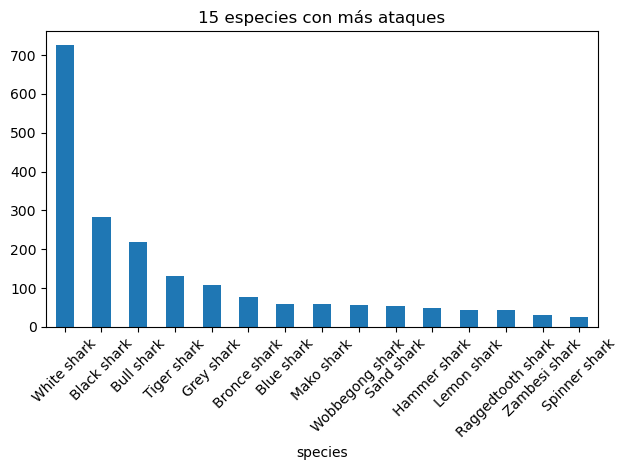

In [76]:
top_especies = df_limpio["species"].value_counts().head(15)
plt.figure()
top_especies.plot(kind="bar")
plt.title("15 especies con más ataques")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

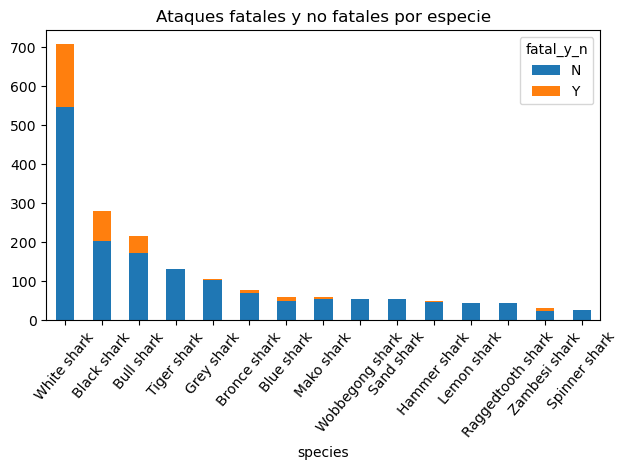

In [77]:
tabla1 = df_limpio.pivot_table(index="species", columns="fatal_y_n", aggfunc="size", fill_value=0)
tabla1 = tabla1.loc[top_especies.index]
tabla1.plot(kind="bar", stacked=True)
plt.title("Ataques fatales y no fatales por especie")
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

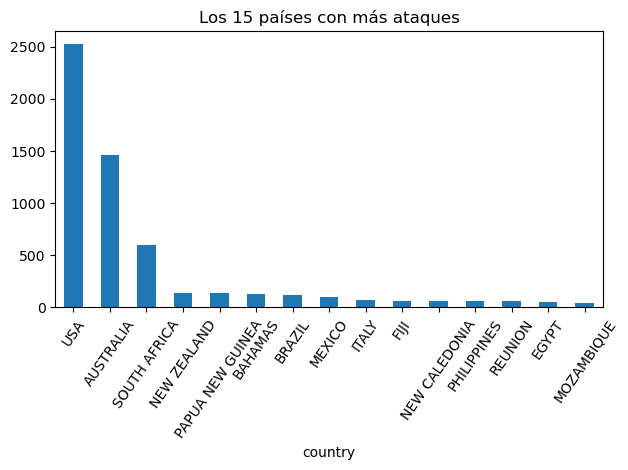

In [78]:
top_paises = df_limpio["country"].value_counts().head(15)
top_paises.plot(kind="bar")
plt.title("Los 15 países con más ataques")
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

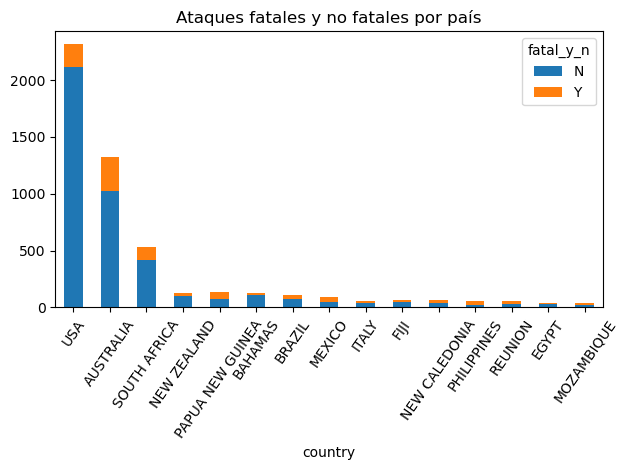

In [79]:
tabla2 = df_limpio.pivot_table(index="country", columns="fatal_y_n", aggfunc="size", fill_value=0)
tabla2 = tabla2.loc[top_paises.index[:15]]
tabla2.plot(kind="bar", stacked=True)
plt.title("Ataques fatales y no fatales por país")
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

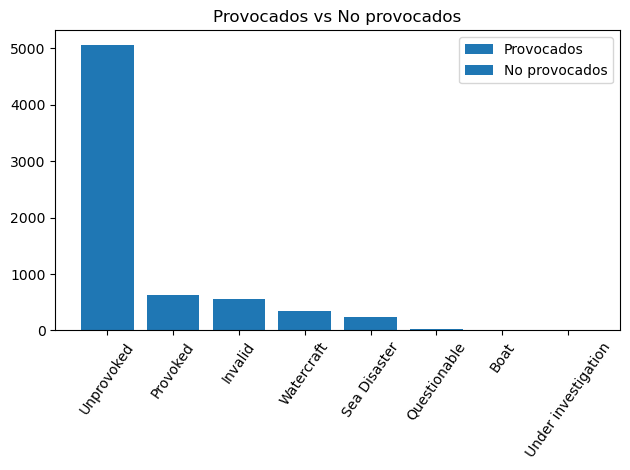

In [80]:
tipo_total = df_limpio["type"].value_counts().head(8)
tipo_fatal = df_limpio[df_limpio["fatal_y_n"] == "Fatal"]["type"].value_counts()
plt.bar(tipo_total.index, tipo_total.values, label="Provocados")
plt.bar(tipo_fatal.index, tipo_fatal.values, label="No provocados")
plt.title("Provocados vs No provocados")
plt.legend()
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

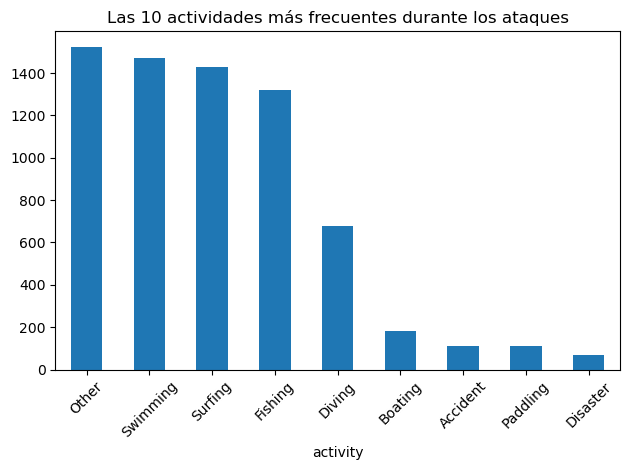

In [81]:
top_actividades = df_limpio["activity"].value_counts().head(10)
top_actividades.plot(kind="bar")
plt.title("Las 10 actividades más frecuentes durante los ataques")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

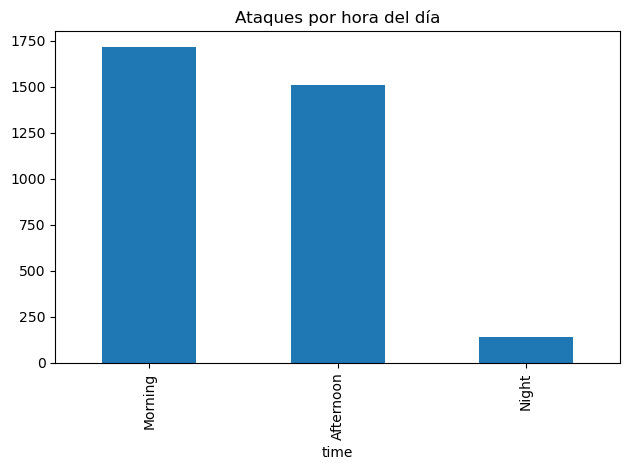

In [82]:
horas = df_limpio["time"].value_counts()
horas.plot(kind="bar")
plt.title("Ataques por hora del día")
plt.tight_layout()
plt.show()


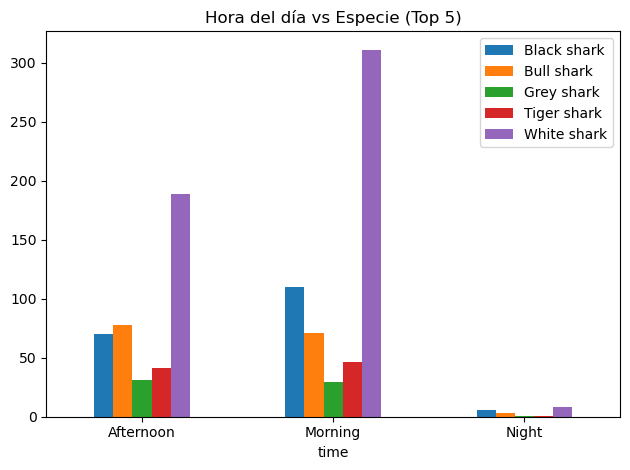

In [83]:
top5_especies = top_especies.index[:5]
filtro = df_limpio[df_limpio["species"].isin(top5_especies)]
tabla_horas = filtro.pivot_table(index="time", columns="species", aggfunc="size", fill_value=0)
tabla_horas.plot(kind="bar")
plt.title("Hora del día vs Especie (Top 5)")
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


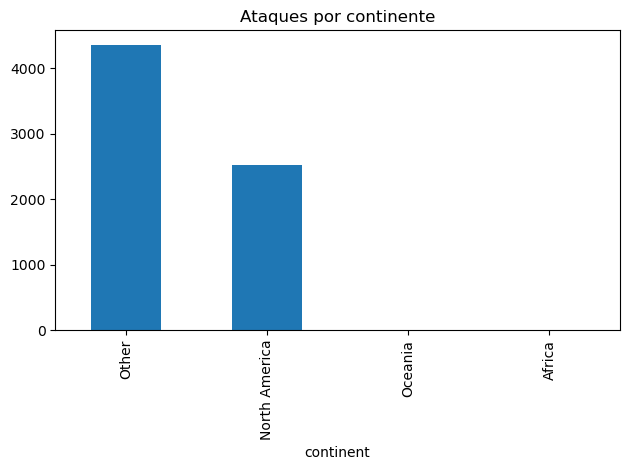

In [200]:
continente = df_limpio["continent"].value_counts()
continente.plot(kind="bar")
plt.title("Ataques por continente")
plt.tight_layout()
plt.show()


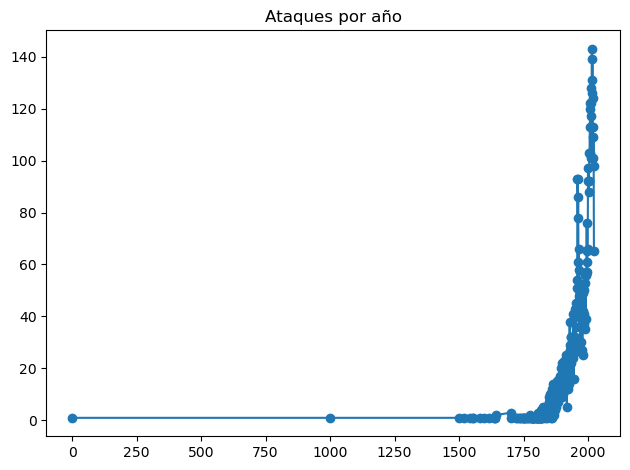

In [87]:
anios = df_limpio["year"].value_counts().sort_index()
plt.plot(anios.index, anios.values, marker="o")
plt.title("Ataques por año")
plt.tight_layout()
plt.show()